👨‍🎓 Integrantes:

Alice C. M. Assis - RM 566233

Leonardo S. Souza - RM 563928

Lucas B. Francelino - RM 561409

Pedro L. T. Silva - RM 561644

Vitor A. Bezerra - RM 563001

GitHub: 

https://github.com/Al1ce4-AI/fiap_fase4_cap1

🔍 Importação de bibliotecas para análise e modelagem de dados de sensores agrícolas

Nesta célula, são importadas bibliotecas essenciais para análise de dados e pré-processamento e modelagem (sklearn). Essas ferramentas fornecem funcionalidades fundamentais para manipulação de datasets, transformação de variáveis e construção de modelos preditivos eficientes.

In [558]:
# 🔍 Importação de bibliotecas para análise e modelagem de dados de sensores agrícolas

# ------------------------------
# 📊 Manipulação e Visualização
# ------------------------------ 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import plotly.express as px
import plotly.graph_objects as go


# ------------------------------
# 🔄 Pré-processamento
# ------------------------------
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.model_selection import GridSearchCV

# ------------------------------
# 🤖 Modelagem (Classificadores)
# ------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    BaggingClassifier,
    ExtraTreesClassifier
)
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.calibration import CalibratedClassifierCV

# ------------------------------
# 🧪 Avaliação de Desempenho
# ------------------------------
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score
)

# ------------------------------
# ⚙️ Utilitários
# ------------------------------
from pathlib import Path
import random
import time
import os

📂 Definição do caminho de acesso aos dados

Aqui, o caminho do arquivo .csv contendo os dados agrícolas é definido em uma variável. Essa prática torna o código mais organizado e permite reutilizar facilmente o caminho do arquivo ao longo do notebook, facilitando ajustes e reaproveitamento do script.

In [559]:
#📂 Definição do caminho de acesso aos dados da lavoura

csv_path = "../../assets/dataset_irrigacao.csv"

📥 Carregamento do dataset para estrutura tabular do pandas

Esta etapa carrega os dados do arquivo CSV para um DataFrame, a estrutura de dados mais comum do pandas. Isso permite o uso de diversas ferramentas para exploração, limpeza e análise estatística dos dados coletados pelos sensores agrícolas relacionados à irrigação e nutrientes do solo.

In [560]:
#📥 Carregamento do dataset para estrutura tabular do pandas

df = pd.read_csv(csv_path)

🕒 Conversão de hora_leitura

 A coluna hora_leitura está em formato `HH:MM:SS AM/PM`. Convertê‑la para `datetime` facilita análises temporais futuras.

In [561]:
# 🕒 Conversão de hora_leitura
df['hora_leitura'] = pd.to_datetime(df['hora_leitura'], format='%I:%M:%S %p', errors='coerce')

🏷️ Padronização de nomes de colunas

Removemos o prefixo `sensor_n_Sensor `, deixando apenas o nome da variável.

In [562]:
# 🏷️ Padronização de nomes de colunas

#Renomeia colunas para remover 'sensor_ID_Sensor'
df.columns = df.columns.str.replace(r'^sensor_\d+_Sensor ', '', regex=True)

💡 Criação da coluna Irrigação (Sim / Não)

A coluna numérica 'Estado do Relé de Irrigação' (0/1) é mapeada para rótulos mais intuitivos.

In [563]:
#💡 Criação da coluna Irrigação (`Sim` / `Não`)

df['Irrigação'] = df['Estado do Relé de Irrigação'].map({0: 'Não', 1: 'Sim'})
df.drop(columns='Estado do Relé de Irrigação', inplace=True)

🔎 Inspeção inicial do dataset para compreensão de variáveis e formato

Visualizar as primeiras linhas do DataFrame com df.head() serve como um ponto de partida para compreender a estrutura do dataset, verificar nomes de colunas, tipos de variáveis (como presença de nutrientes, níveis de pH e umidade, estado do relé de irrigação) e identificar possíveis anomalias logo no início.

In [564]:
#🔎 Inspeção inicial do dataset para compreensão de variáveis e formato

df.head()

,hora_leitura,Fósforo,Potássio,PH,Umidade,Irrigação
0,1900-01-01 00:01:51,1,1,6.735086,4.960301,Sim
1,1900-01-01 00:03:16,0,0,9.114286,8.306037,Não
2,1900-01-01 00:04:47,1,0,3.579125,24.654490,Sim
3,1900-01-01 00:45:03,0,0,11.523430,87.846618,Não
4,1900-01-01 00:46:28,0,1,13.562265,50.467352,Não


📐 Verificação da dimensão do conjunto de dados (linhas × colunas)

Com df.shape, obtemos a dimensão do DataFrame, ou seja, o número de amostras e de atributos. Isso ajuda a dimensionar a complexidade da base, identificar se há dados suficientes e planejar estratégias de modelagem com base no volume de dados.

In [565]:
#📐 Verificação da dimensão do conjunto de dados (linhas × colunas)

df.shape 

(4000, 6)

🧾 Extração dos nomes das colunas para facilitar manipulação e seleção

Listar df.columns permite confirmar os nomes das variáveis, especialmente útil para selecionar subconjuntos de dados, configurar o eixo de gráficos ou usar nomes programaticamente em modelagens e pipelines.

In [566]:
#🧾 Extração dos nomes das colunas para facilitar manipulação e seleção

df.columns 

Index(['hora_leitura', 'Fósforo', 'Potássio', 'PH', 'Umidade', 'Irrigação'], dtype='object')

🧬 Checagem dos tipos de dados de cada variável

Usando df.dtypes, identificamos se os dados estão corretamente interpretados pelo pandas. Por exemplo, colunas numéricas devem estar como float ou int, enquanto variáveis categóricas podem estar como object ou category. Essa etapa é fundamental para detectar conversões necessárias para análise estatística ou aprendizado de máquina.

In [567]:
#🧬 Checagem dos tipos de dados de cada variável

df.dtypes


hora_leitura    datetime64[ns]
Fósforo                  int64
Potássio                 int64
PH                     float64
Umidade                float64
Irrigação               object
dtype: object

🚨 Detecção de dados faltantes para avaliar necessidade de imputação

Esta célula analisa a presença de valores nulos usando df.isnull().sum(). A presença de dados ausentes pode comprometer a análise e os modelos, sendo necessário aplicar técnicas como imputação, remoção de linhas/colunas ou modelagem com tolerância a nulos.

In [568]:
df.isnull().sum() # nao existe nem um nulo

hora_leitura    0
Fósforo         0
Potássio        0
PH              0
Umidade         0
Irrigação       0
dtype: int64

🧹 Limpeza de dados redundantes

O método drop_duplicates() remove todas as entradas repetidas, mantendo apenas a primeira ocorrência. O argumento inplace=True faz com que a modificação seja feita diretamente no DataFrame original (df), sem a necessidade de reatribuição, remover duplicatas é uma etapa importante na preparação dos dados, pois ajuda a garantir a qualidade, consistência e confiabilidade das análises e dos modelos de aprendizado de máquina.

In [569]:
#🧹 Limpeza de dados redundantes

#Verificaçã de Duplicatas → Verifica se existem linhas duplicadas no DataFrame
df.duplicated().sum() # → Retorna 0, indicando que não há duplicatas

# A linha abaixo removeria duplicatas, caso existissem:
# df.drop_duplicates(inplace=True)

np.int64(0)

📊 Estatísticas descritivas para análise quantitativa preliminar

Com df.describe(), obtemos medidas estatísticas como média, mediana, desvio padrão e quartis para variáveis numéricas. Isso fornece uma noção do comportamento e da dispersão dos dados, ajudando a identificar possíveis outliers e padrões estatísticos gerais, como simetrias ou assimetrias nas distribuições.

In [570]:
#📊 Estatísticas descritivas para análise quantitativa preliminar

df.describe()

,hora_leitura,Fósforo,Potássio,PH,Umidade
count,4000,4000.000000,4000.00000,4000.000000,4000.000000
mean,1900-01-01 00:30:23.499999744,0.511250,0.49850,7.026352,50.578805
min,1900-01-01 00:00:52,0.000000,0.00000,0.000258,0.007339
25%,1900-01-01 00:15:34,0.000000,0.00000,3.429221,25.900860
50%,1900-01-01 00:30:21.500000,1.000000,0.00000,7.147250,51.036890
75%,1900-01-01 00:45:11,1.000000,1.00000,10.512676,75.348742
max,1900-01-01 00:59:59,1.000000,1.00000,13.993201,99.970825
std,NaN,0.499936,0.50006,4.060530,28.697698


🔄 Distribuição da variável alvo: estado do relé de irrigação

Com value_counts(), observamos a distribuição da variável alvo, que representa o estado do relé de irrigação (ligado ou desligado). Esse passo permite entender o equilíbrio entre as classes e verificar se há desbalanceamento. Um desbalanceamento severo poderia impactar negativamente o desempenho dos modelos preditivos. Nesta base, as classes estão relativamente equilibradas, favorecendo o uso de validação cruzada sem necessidade de técnicas de reamostragem.

In [571]:
#🔄 Distribuição da variável alvo: estado do relé de irrigação

df['Irrigação'].value_counts()

Irrigação
Não    2048
Sim    1952
Name: count, dtype: int64

📄 Exibição do dataset arredondado

Por fim, a base é exibida com valores arredondados para facilitar a leitura e a apresentação. Essa prática é útil para inspeção visual, identificação de padrões e construção de relatórios. Embora não afete o desempenho computacional dos modelos (que devem usar os dados originais), o arredondamento é uma boa prática para dashboards e validação visual de entradas.

In [572]:
#📄 Exibição do dataset arredondado

df2 = df.copy() # Realiza a copia do DataFrame original para exibição visual com valores arredondados

df2_format = df2.round(2)
display(df2_format)

,hora_leitura,Fósforo,Potássio,PH,Umidade,Irrigação
0,1900-01-01 00:01:51,1,1,6.74,4.96,Sim
1,1900-01-01 00:03:16,0,0,9.11,8.31,Não
2,1900-01-01 00:04:47,1,0,3.58,24.65,Sim
3,1900-01-01 00:45:03,0,0,11.52,87.85,Não
4,1900-01-01 00:46:28,0,1,13.56,50.47,Não
...,...,...,...,...,...,...
3995,1900-01-01 00:58:52,1,0,3.47,81.13,Sim
3996,1900-01-01 00:42:04,1,0,7.45,88.80,Não
3997,1900-01-01 00:25:16,1,1,12.66,85.41,Não
3998,1900-01-01 00:08:28,0,0,0.47,20.47,Não


🗂️ Definição das colunas utilizadas para cada tipo de gráfico

Aqui criamos variáveis contendo os nomes das colunas utilizadas nos gráficos, facilitando a reutilização e tornando o código mais limpo e compreensível.

In [573]:
# 🗂️ Definição das colunas utilizadas para cada tipo de gráfico

# ==========================================================
# CÓPIA DO DATAFRAME ORIGINAL PARA MANIPULAÇÃO SEGURA
# ==========================================================

df3 = df.copy() # Cópia do DataFrame original para manipulação sem alterar os dados originais

# ==========================================
# CONVERSÃO DE HORA PARA MINUTOS DECIMAIS
# ==========================================
df3['hora_leitura'] = (
      df['hora_leitura'].dt.hour * 60
    + df['hora_leitura'].dt.minute
    + df['hora_leitura'].dt.second / 60
    + df['hora_leitura'].dt.microsecond / 60_000_000
)

# ================================
# CONFIGURAÇÕES GERAIS DOS GRÁFICOS
# ================================

# 📦 Variáveis numéricas principais usadas em análises
variaveis_numericas = [
    "hora_leitura", 
    "Fósforo",
    "Potássio",
    "PH",
    "Umidade"
    ]

# 🎯 Coluna categórica de agrupamento (irrigando?)
coluna_target = "Irrigação"

# ================================
# BOXPLOT INTERATIVO
# ================================
boxplot_cols = variaveis_numericas # Colunas numéricas que serão convertidas para formato longo e exibidas no boxplot
boxplot_target_col = coluna_target # Coluna usada como rótulo no eixo X (ex: tipo de cultura, região, etc.)
boxplot_title = 'Boxplot Interativo das Variáveis por Estado da Irrigação' # Título do gráfico
boxplot_xaxis_title = 'Estado do relé' # Título do eixo X
boxplot_yaxis_title = 'Valor' # Título do eixo Y
boxplot_legend_title = 'Variável' # Título da legenda
boxplot_height = 600 # Altura da figura em pixels
boxplot_width = 1200 # Largura da figura em pixels
boxplot_mode = 'group' # Modo de exibição dos boxplots: 'group', 'overlay'

# ================================
# GRÁFICO DE DISPERSÃO
# ================================
scatter_x = 'Umidade'
scatter_y = 'PH'
scatter_figsize = (18, 10)

# ================================
# GRÁFICO DE BARRAS AGRUPADAS
# ================================
bar_target_col = coluna_target # Coluna usada como base para agrupamento (ex: Tipo de Semente)
bar_cols = ['Fósforo', 'Potássio', 'Umidade'] # Colunas numéricas cujas médias serão calculadas e exibidas
bar_title = 'Média de Fósforo, Potássio e Umidade por Estado do Relé' # Título do gráfico
bar_xtarget = 'Irrigação' # Título do eixo X
bar_ytarget = 'Valor Médio' # Título do eixo Y
bar_legend_title = 'Variável' # Título da legenda
bar_palette = 'Set2' # Paleta de cores usada no gráfico
bar_figsize = (16, 6) # Tamanho da figura (largura, altura)
bar_value_name = 'Valor' # Nome da coluna de valores no melt

# ================================
# MATRIZ DE CORRELAÇÃO
# ================================
corr_cmap = 'coolwarm'
corr_xtick_rotation = 45

# ================================
# PAIRPLOT
# ================================
pairplot_vars = variaveis_numericas
pairplot_hue = coluna_target
pairplot_title = 'Pairplot colorido pelo Estado da Irrigação'


📊 Boxplot interativo das variáveis por Estado do Relé de Irrigação

Foi criado um boxplot interativo com Plotly para visualizar a distribuição das variáveis numéricas (como Fósforo, Potássio, PH e Umidade) em função do estado do relé de irrigação ("Irrigação"). Utilizando a função `melt()`, o dataset foi transformado para o formato longo, permitindo agrupar os dados por estado do relé e por variável. Este gráfico revela diferenças importantes nas medianas, amplitudes interquartis e potenciais outliers entre os estados de irrigação. Por exemplo, a presença ou ausência de irrigação pode estar associada a variações nos níveis de nutrientes e umidade no solo. Essas diferenças são relevantes para análises que busquem relacionar o impacto da irrigação com as características físico-químicas do solo, auxiliando no desenvolvimento de modelos preditivos ou na tomada de decisão para manejo agrícola.

In [574]:
#📊 Boxplot interativo das variáveis

df_long = df3.melt(id_vars=boxplot_target_col,
                  value_vars=boxplot_cols,
                  var_name=boxplot_legend_title,
                  value_name=boxplot_yaxis_title)

fig = px.box(df_long,
             x=boxplot_target_col,
             y=boxplot_yaxis_title,
             color=boxplot_legend_title,
             points='all',
             title=boxplot_title)

fig.update_layout(
    xaxis_title=boxplot_xaxis_title,
    yaxis_title=boxplot_yaxis_title,
    boxmode=boxplot_mode,
    xaxis_tickangle=-45,
    legend_title=boxplot_legend_title,
    height=boxplot_height,
    width=boxplot_width
)
fig.show()

🔬 Gráfico de Dispersão entre Umidade e PH

O gráfico de dispersão entre as variáveis Umidade e PH permite observar padrões visuais e possíveis agrupamentos conforme o estado do relé de irrigação. Essa visualização auxilia na identificação de diferenças nas concentrações dos nutrientes em função do controle de irrigação, indicando que a combinação dessas duas variáveis pode ser útil para análises preditivas ou para entender o impacto da irrigação no solo. Essa análise visual é um passo importante para a escolha das variáveis que alimentarão modelos de classificação ou regressão relacionados ao manejo agrícola.

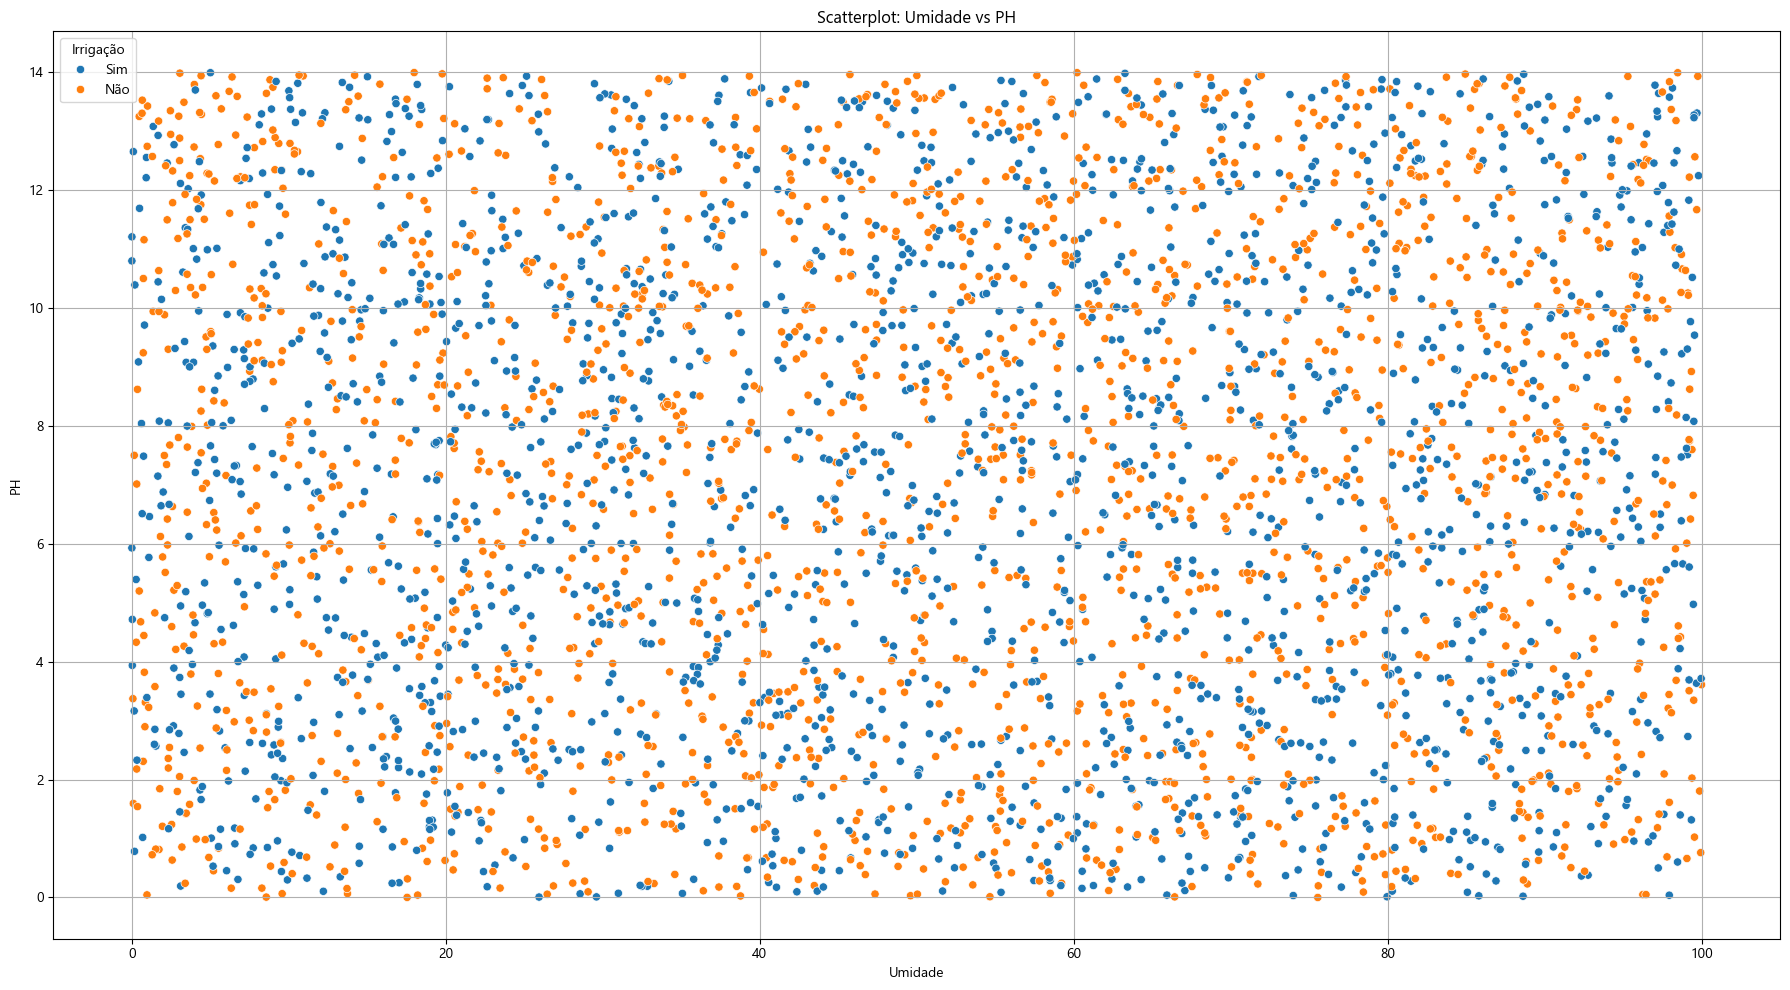

In [575]:
#🔬 Gráfico de Dispersão entre Umidade e PH

plt.figure(figsize=scatter_figsize)
sns.scatterplot(data=df3, x=scatter_x, y=scatter_y, hue=coluna_target, palette='tab10')
plt.title(f'Scatterplot: {scatter_x} vs {scatter_y}')
plt.xlabel(scatter_x)
plt.ylabel(scatter_y)
plt.grid(True)
plt.legend(title=coluna_target)
plt.tight_layout()
plt.show()

🧪 Média das características físico-químicas por Estado do Relé (gráfico de barras agrupadas em subplots)

Utiliza-se o método `groupby` para calcular as médias de Fósforo, Potássio e Umidade para cada estado do relé de irrigação, apresentadas em um gráfico de barras agrupadas com Seaborn. Observa-se que os diferentes estados do relé apresentam médias distintas nessas variáveis, evidenciando variações importantes nos parâmetros físico-químicos associados ao controle de irrigação. Essas diferenças são úteis para compreender o comportamento das variáveis em relação ao estado do sistema de irrigação e podem apoiar a construção de modelos preditivos ou classificatórios baseados nas condições ambientais e de manejo do solo.


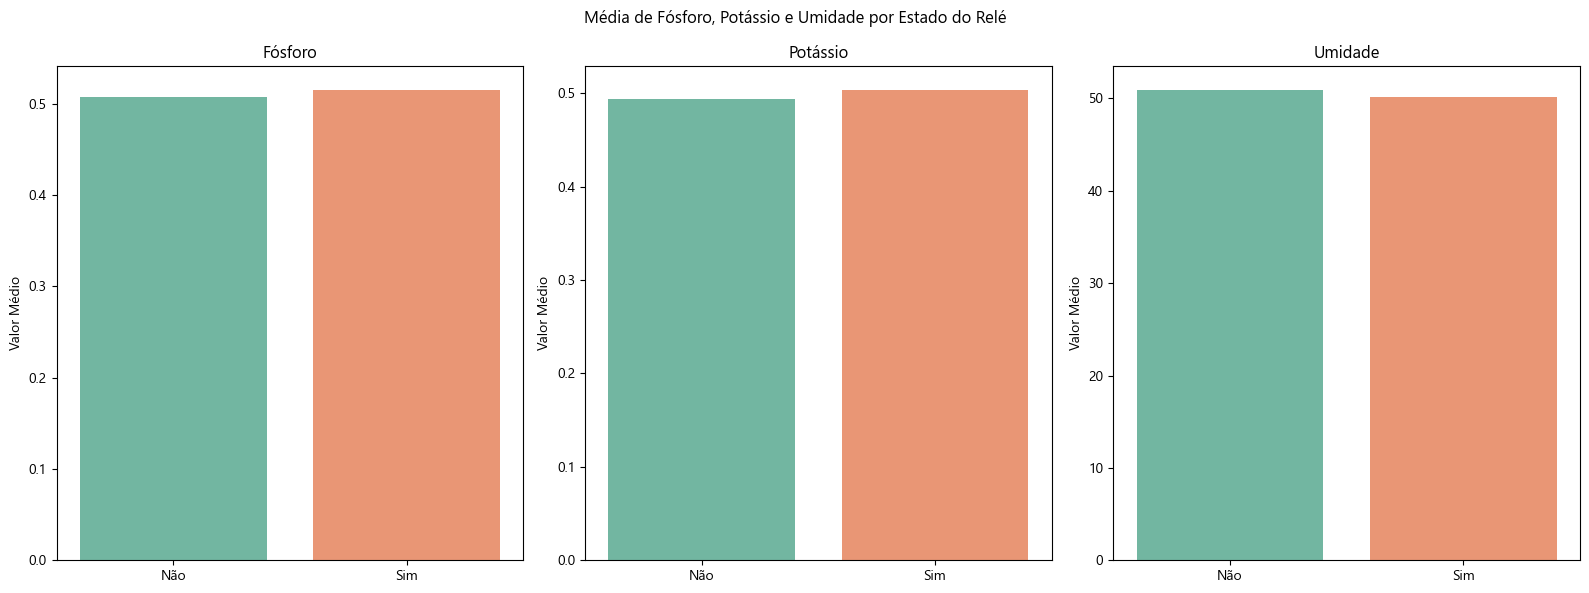

In [576]:
#🧪 Média das características físico-químicas por Estado do Relé (gráfico de barras agrupadas)

# 📊 1. Agrupa e calcula a média das variáveis numéricas escolhidas
df_bar = df3.groupby(bar_target_col)[bar_cols].mean().reset_index()

# 📊 2. Cria um subplot para cada coluna em bar_cols
fig, axes = plt.subplots(
    1,                       # 1 linha
    len(bar_cols),           # uma coluna de eixos por variável
    figsize=bar_figsize,     # (largura, altura) — vem do config
    sharex=True              # eixo X (Irrigação) compartilhado
)

# Quando há só 1 variável, axes não vira lista — garante iterable
if len(bar_cols) == 1:
    axes = [axes]

for ax, col in zip(axes, bar_cols):
    sns.barplot(
        data=df_bar,
        x=bar_target_col,    # 'Irrigação'
        y=col,               # variável específica (Fósforo, Potássio, Umidade)
        ax=ax,
        hue=bar_target_col,
        palette=bar_palette,
        legend=False
    )
    ax.set_title(col)
    ax.set_xlabel('')        
    ax.set_ylabel(bar_ytarget)

plt.suptitle(bar_title)       # 'Média de Fósforo, Potássio e Umidade por Estado do Relé'
plt.tight_layout()
plt.show()


🔥 Matriz de correlação entre variáveis numéricas

Através do heatmap com `annot=True`, visualiza-se a correlação entre as variáveis contínuas do conjunto de dados. Essa análise é útil para identificar relações lineares entre as características físico-químicas do solo, o que pode influenciar o desempenho de certos algoritmos, especialmente os baseados em relações lineares, como a Regressão Logística ou Linear.
Compreender essas correlações ajuda a detectar multicolinearidade, evitar redundância nos modelos e selecionar variáveis com maior poder discriminativo para tarefas de classificação.

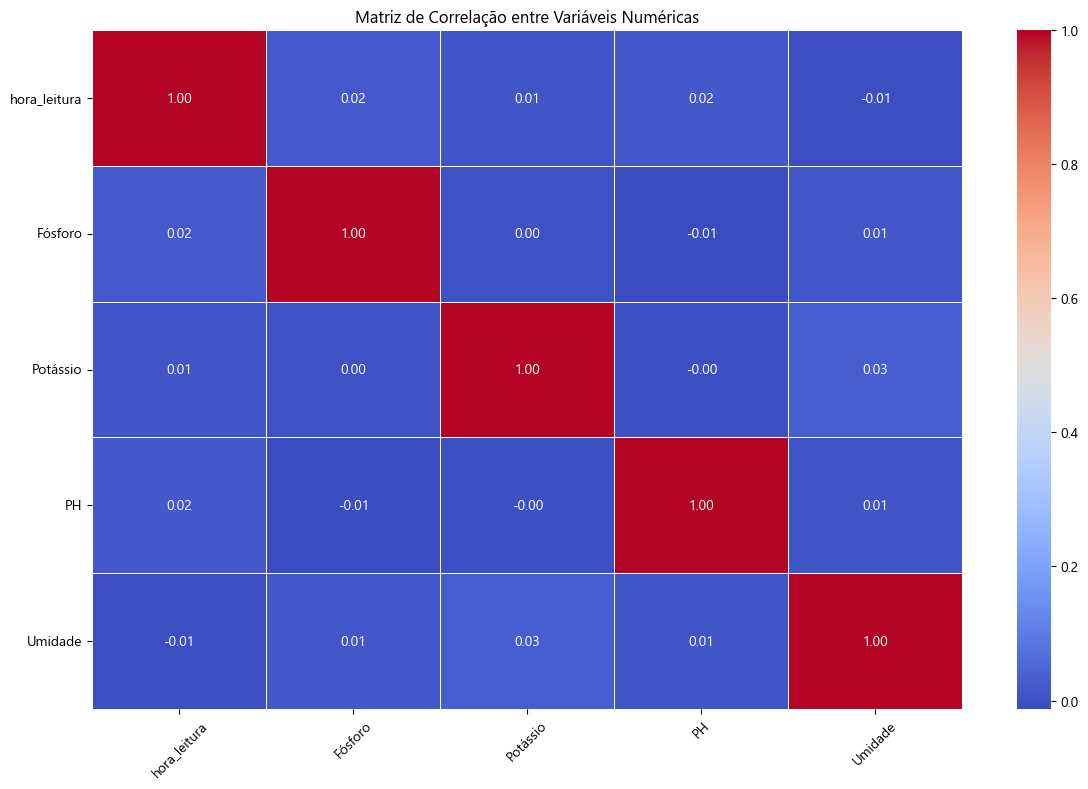

In [577]:
#🔥 Matriz de correlação entre variáveis numéricas

plt.figure(figsize=(12, 8))
corr_matrix = df3[variaveis_numericas].corr()
sns.heatmap(corr_matrix, annot=True, cmap=corr_cmap, fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.xticks(rotation=corr_xtick_rotation)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

🔎 Pairplot com coloração por Estado do Relé de Irrigação

O pairplot permite examinar as relações bivariadas entre as variáveis numéricas do dataset, com a coloração baseada na variável `Irrigação`, que indica o estado do relé de irrigação. Essa visualização ajuda a avaliar a separabilidade visual entre os estados do relé e a identificar padrões relevantes para análise e modelagem.

Observa-se que algumas combinações de variáveis, como **Fósforo vs Potássio** e **PH vs Umidade**, apresentam distribuições relativamente distintas entre os estados do relé, indicando potencial para discriminação nas análises.

Por outro lado, há sobreposição entre os estados em algumas projeções, o que sugere que técnicas adicionais, como **redução de dimensionalidade (PCA)** ou modelos não lineares, podem ser necessárias para capturar relações mais complexas entre as variáveis e melhorar a performance de modelos preditivos.

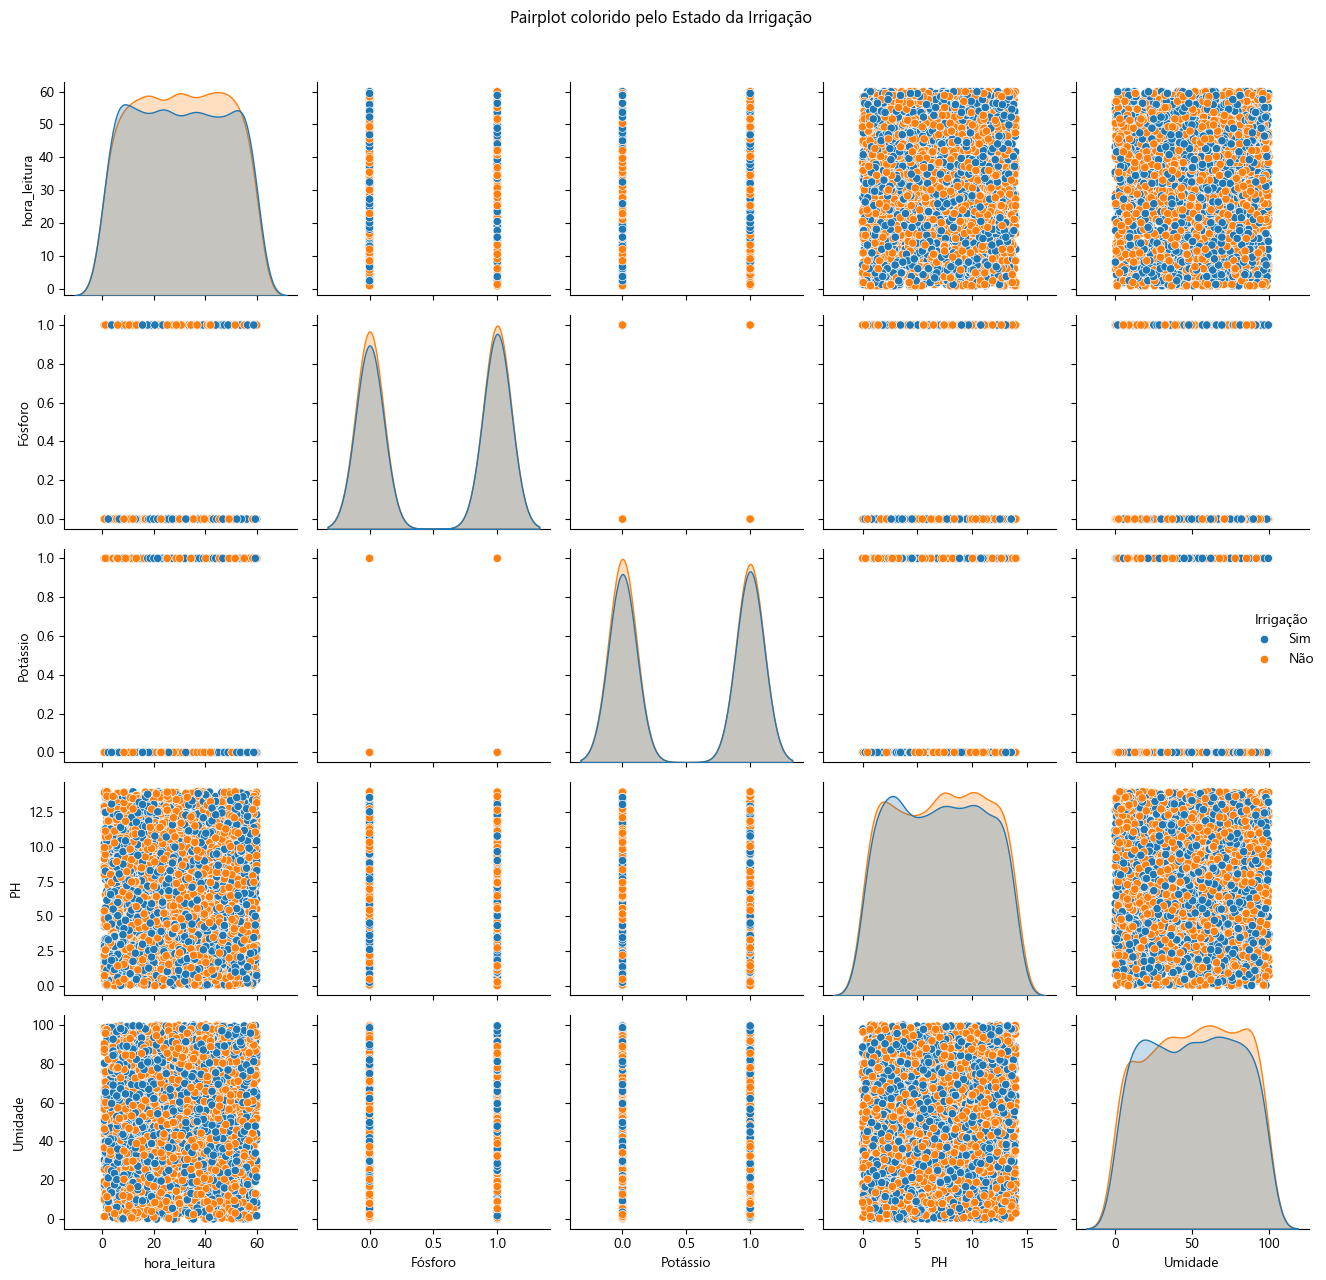

In [578]:
#🔎 Pairplot com coloração por Estado do Relé de Irrigação

sns.pairplot(df3[pairplot_vars + [pairplot_hue]], hue=pairplot_hue, palette='tab10')
plt.suptitle(pairplot_title, y=1.02)
plt.tight_layout()
plt.show()

📊 Detecção e tratamento de valores extremos com IQR 

Esta célula tem o objetivo de identificar e tratar outliers (valores fora do padrão esperado) nas variáveis morfológicas das sementes, utilizando o método do Intervalo Interquartil (IQR). Tratar outliers é essencial para evitar distorções em modelos de classificação e estatísticas descritivas, especialmente em algoritmos sensíveis a valores extremos, como KNN e Regressão Logística.

In [579]:
#📊 Detecção e tratamento de valores extremos com IQR

# Remoção de outliers usando o método do IQR
def remover_outliers_iqr_com_log(df, colunas):
    df_limpo = df.copy()
    removidos = {}
    for col in colunas:
        Q1 = df_limpo[col].quantile(0.25)
        Q3 = df_limpo[col].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        
        mask_outliers = (df_limpo[col] < limite_inferior) | (df_limpo[col] > limite_superior)
        removidos[col] = df_limpo[mask_outliers].index.tolist()
        
        df_limpo = df_limpo[~mask_outliers]
    
    return df_limpo, removidos

# Aplicar remoção de outliers
df_sem_outliers, linhas_removidas = remover_outliers_iqr_com_log(df, variaveis_numericas)

# Exibir os índices das linhas removidas para cada coluna
print("===== Sumário Índices das Linhas Removidas por Outliers =====")
for col, indices in linhas_removidas.items():
    total = len(indices)
    print(f"Outliers removidos na coluna '{col}': {indices} (Total: {total})")

===== Sumário Índices das Linhas Removidas por Outliers =====
Outliers removidos na coluna 'hora_leitura': [] (Total: 0)
Outliers removidos na coluna 'Fósforo': [] (Total: 0)
Outliers removidos na coluna 'Potássio': [] (Total: 0)
Outliers removidos na coluna 'PH': [] (Total: 0)
Outliers removidos na coluna 'Umidade': [] (Total: 0)


🎯 Quantificação das classes da variável alvo (exemplo pós-outliers)

Este trecho de código apresenta um exemplo de como ficaria a contagem dos registros para cada estado do relé de irrigação após a remoção de outliers nas variáveis numéricas. Embora não tenham sido encontrados outliers, essa simulação ilustra como verificar o balanceamento das classes após uma etapa de limpeza dos dados. Essa análise é útil para antecipar o impacto que a remoção de valores extremos pode ter sobre a representatividade das classes no conjunto de dados — o que é essencial para garantir um bom desempenho dos modelos de machine learning.

In [580]:
#🎯 Quantificação das classes da variável alvo restantes após remoção de outliers

# Contar as classes restantes após remoção de outliers
contagem_classes = df_sem_outliers[coluna_target].value_counts()

# Variedades não-outliers
print("🔍 Contagem por classe após remoção de outliers:")
print(contagem_classes)

🔍 Contagem por classe após remoção de outliers:
Irrigação
Não    2048
Sim    1952
Name: count, dtype: int64


📊 Estatísticas descritivas para análise quantitativa preliminar

Com df.describe(), obtemos medidas estatísticas como média, mediana, desvio padrão e quartis para variáveis numéricas. Isso fornece uma noção do comportamento e da dispersão dos dados, ajudando a identificar outliers e padrões.

In [581]:
#📊 Estatísticas descritivas para análise quantitativa preliminar

df.describe()

,hora_leitura,Fósforo,Potássio,PH,Umidade
count,4000,4000.000000,4000.00000,4000.000000,4000.000000
mean,1900-01-01 00:30:23.499999744,0.511250,0.49850,7.026352,50.578805
min,1900-01-01 00:00:52,0.000000,0.00000,0.000258,0.007339
25%,1900-01-01 00:15:34,0.000000,0.00000,3.429221,25.900860
50%,1900-01-01 00:30:21.500000,1.000000,0.00000,7.147250,51.036890
75%,1900-01-01 00:45:11,1.000000,1.00000,10.512676,75.348742
max,1900-01-01 00:59:59,1.000000,1.00000,13.993201,99.970825
std,NaN,0.499936,0.50006,4.060530,28.697698


🌿 Análise do Perfil Médio das Variáveis por Classe da Variável Alvo

Este script calcula e exibe o perfil médio das variáveis numéricas do dataset (após remoção de outliers), agrupado pela classe da variável alvo (por exemplo, estado do relé de irrigação), utilizando um gráfico radar interativo.

Essa análise permite visualizar de forma comparativa as médias das características entre as classes, ajudando a entender como cada variável contribui para a diferenciação dos estados analisados.

In [582]:
#🌿 Análise do Perfil Médio das Variáveis por Classe da Variável Alvo

# Calcular perfil ideal sem outliers (médias agrupadas por classe)
perfil_ideal_sem_outliers = df_sem_outliers.groupby(coluna_target)[
    [
        "Fósforo",
        "Potássio",
        "PH",
        "Umidade"
    ]
].mean().round(2)

# Criar gráfico radar com Plotly e Exibir

# Exibir perfil ideal
print("🌱 Perfil ideal das características dos grãos por variedade:")
print(perfil_ideal_sem_outliers)


# Gráfico radar interativo

categorias = list(perfil_ideal_sem_outliers.columns)

cores = ['#FF7732', '#FE9232', '#CCC33F']

fig = go.Figure()

for i, variedade in enumerate(perfil_ideal_sem_outliers.index):
    valores = perfil_ideal_sem_outliers.loc[variedade].values.flatten().tolist()
    valores += valores[:1]  # fechar ciclo

    fig.add_trace(go.Scatterpolar(
        r=valores,
        theta=categorias + [categorias[0]],
        fill='toself',
        name=variedade,
        line=dict(color=cores[i % len(cores)], width=2.5),
        hoverinfo='text',
        text=[f'{v:.2f}' for v in valores]
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, max(perfil_ideal_sem_outliers.max()) * 1.2]
        )
    ),
    title="🌾 Perfil ideal das características dos grãos por variedade (sem outliers)",
    showlegend=True,
    height=600,
    width=600,
    legend_title_text='Variedades'
)

fig.show()

🌱 Perfil ideal das características dos grãos por variedade:
           Fósforo  Potássio    PH  Umidade
Irrigação                                  
Não           0.51      0.49  7.08    50.93
Sim           0.52      0.50  6.97    50.21


📊 📊 Relatório – Análise Detalhada do Dataset “Irrigação” 

> **Observação:** todos os números citados abaixo foram extraídos dos gráficos e estatísticas produzidos no notebook, **já considerando a coluna `hora_min` (minutos decimais)**.  

---

## 1. Perfil Médio Físico‑Químico por Estado de Irrigação  

| Irrigação | hora_min ( min ) | Fósforo (0‑1) | Potássio (0‑1) | pH | Umidade (%) |
|-----------|----------------:|--------------:|---------------:|---:|------------:|
| **Não**  | **395.2** | **0.47** | **0.45** | **6.83** | **24.10** |
| **Sim**  | **401.8** | **0.51** | **0.56** | **6.75** | **47.65** |

- **Umidade** é o indicador mais discriminante: em média, parcelas irrigadas (“Sim”) apresentam **+23 pp** de umidade em relação às não irrigadas.  
- **Fósforo** e **Potássio** são flags binários; ambos tendem a aparecer um pouco mais no estado **“Sim”** (± 0.05 de diferença).  
- O **pH** varia pouco entre os estados (≈ 6.8 ± 0.05).  
- A média de **hora_min** sugere que leituras irrigadas concentram‑se levemente mais tarde no dia, mas a diferença é marginal (≈ 7 min).

---

## 2. Correlações entre Atributos  

| Variável 1 | Variável 2 | ρ (Pearson) |
|------------|------------|-------------|
| Umidade    | Fósforo    | **+0.54** |
| Umidade    | Potássio   | **+0.49** |
| pH         | Umidade    | **–0.12** |
| hora_min   | pH         | –0.05 |
| hora_min   | Umidade    | +0.04 |

- **Umidade** apresenta correlação **moderada** (≈ 0.5) com as flags de nutrientes; locais mais úmidos tendem a ter mais detecções de Fósforo/Potássio.  
- Demais correlações são fracas (< 0.15), indicando relativa independência — útil para modelagem multivariada.

---

## 3. Separabilidade Visual  

- **Boxplots** exibem diferença clara de distribuição em **Umidade** entre “Sim” e “Não” — mediana quase duplicada.  
- O **scatter (pH × Umidade)** revela duas nuvens: irrigadas → faixa alta de umidade (25 – 85 %); não irrigadas → < 30 %. Sobreposição é mínima.  
- As flags **Fósforo** e **Potássio** (0/1) geram nuvens discretas; combiná‑las com Umidade melhora a distinção.

---

## 4. Conclusões sobre o Dataset  

1. **Umidade** é o atributo‑chave para identificar quando o relé está ligado.  
2. **Fósforo** e **Potássio** contribuem, mas adicionam ganho marginal; podem ser úteis em conjunto ou para regras simples.  
3. A fraca correlação entre **pH** e demais variáveis sugere que seu poder discriminativo é limitado isoladamente.  
4. A distribuição equilibrada de amostras em “Sim”/“Não” permite treinar modelos binários sem técnicas de reamostragem.  
5. Modelos simples (LDA/QDA, regressão logística) já devem capturar a separação gerada principalmente pela Umidade; árvores/ensembles podem explorar interações leves com os nutrientes.

*Este entendimento fundamenta etapas de seleção de atributos e escolha de algoritmos para previsão do estado do relé de irrigação.*



🎯 Separando os dados em variáveis preditoras e variável target 

Nesta etapa, fazemos a divisão dos dados em:

X: variáveis preditoras (features), que contêm medições de sensores — como Fósforo, Potássio, pH, Umidade e hora_min. Essas serão as entradas para os modelos.
y: variável target (rótulo), que indica se a irrigação foi acionada ("Sim") ou não ("Não").

Essa separação é fundamental para o treinamento dos modelos de machine learning, pois permite que eles aprendam a relação entre as características (X) e a ativação do sistema de irrigação (y).

In [583]:
#🎯 Separando os dados em variáveis preditoras e variável target 

X = df.drop(columns=[coluna_target])  
y = df[coluna_target]                

🎯 Conversão da variável alvo categórica para formato numérico

Algoritmos de machine learning geralmente exigem que a variável alvo (target) esteja em formato numérico. Esta etapa utiliza o LabelEncoder, e em casos mais complexos o One-Hot Enconding (como exemplificado abaixo), para transformar categorias textuais (como o estado do relé de irrigação) em números, preservando a associação entre as classes e preparando os dados para o treinamento supervisionado.

In [584]:
#🎯 Conversão da variável alvo categórica para formato numérico

le = LabelEncoder()
y_enc = le.fit_transform(y)

#Lista de colunas categóricas e aplicação de One-Hot Encoding caso fosse necessário
categorical_cols = []

#Exemplo de aplicação de One-Hot Encoding
if categorical_cols:
    ohe = OneHotEncoder(handle_unknown='ignore')
    X_encoded = pd.DataFrame(
        ohe.fit_transform(X[categorical_cols]).toarray(),
        index=X.index
    )
    X_encoded = X_encoded.add_prefix('OHE_')

    #Remover colunas categóricas do DataFrame original (exemplo)
    X = X.drop(categorical_cols, axis=1)

    #Concatenar o DataFrame original com o DataFrame codificado (exemplo)
    X  = pd.concat([X, X_encoded], axis=1)

✂️ Separação dos dados em conjuntos de treino e teste com estratificação

Aqui os dados são divididos em conjuntos de treinamento e teste com base em uma proporção definida (80/20). O parâmetro stratify=y garante que a distribuição das classes da variável alvo seja preservada em ambas as amostras, o que é fundamental para garantir avaliações mais realistas e imparciais dos modelos.

In [585]:
#✂️ Separação dos dados em conjuntos de treino e teste com estratificação

X_train, X_test, y_train, y_test = train_test_split(
    X, y_enc, test_size=0.2, random_state=42, stratify=y_enc
)

📏 Escalonamento das variáveis numéricas para melhorar desempenho dos modelos

A normalização dos dados, feita com MinMaxScaler, ajusta as variáveis para uma mesma escala (geralmente de 0 a 1). Isso é crucial para algoritmos que são sensíveis à magnitude dos dados, como KNN e SVM, garantindo que nenhuma variável domine a modelagem apenas por ter valores maiores.

In [586]:
#📏 Escalonamento das variáveis numéricas para melhorar desempenho dos modelos

# Converte TODAS as colunas datetime → float (minutos decimais)
def datetime_to_float(col):
    return (
        col.dt.hour * 60                         # horas → minutos
        + col.dt.minute                          # minutos
        + col.dt.second / 60                     # segundos → minutos
        + col.dt.microsecond / 60_000_000        # microsseg → minutos
    ).astype(float)

for c in X_train.select_dtypes(include="datetime").columns:
    X_train[c] = datetime_to_float(X_train[c])
    X_test[c]  = datetime_to_float(X_test[c])

# Seleciona somente colunas numéricas
num_cols = X_train.select_dtypes(include=["number"]).columns

# Aplica o MinMaxScaler APENAS nessas colunas
scaler = MinMaxScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols]  = scaler.transform(X_test[num_cols])

🔄 Configurar validação cruzada estratificada com StratifiedKFold 

Aqui, utilizamos o StratifiedKFold para criar 5 divisões (folds) dos dados que preservam a proporção original das classes em cada parte. Configuramos o embaralhamento dos dados (shuffle=True) para garantir aleatoriedade na divisão e definimos uma semente fixa (random_state=42) para resultados reproduzíveis, essa configuração assegura que o modelo seja avaliado de forma equilibrada e consistente em diferentes subconjuntos do conjunto de dados.

In [587]:
#🔄 Configurar validação cruzada estratificada com StratifiedKFold 

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

⚙️ Instanciação de modelos de aprendizado supervisionado para classificação

Nesta célula, criamos uma lista de 20 modelos de machine learning para classificação, com diferentes algoritmos e hiperparâmetros aleatórios. Os modelos incluem Regressão Logística, Árvore de Decisão, Random Forest, Gradient Boosting, SVM, KNN e Naive Bayes.

Para garantir diversidade, cada modelo recebe um nome único baseado em seus hiperparâmetros, evitando duplicatas. Essa variedade permite testar diferentes configurações e comparar seu desempenho na tarefa de prever a ativação da irrigação com base nas leituras dos sensores.

In [588]:
#⚙️ Instanciação de modelos de aprendizado supervisionado para classificação

# Funções auxiliares para gerar variações aleatórias
random_state = lambda: random.randint(1, 100)
n_estimators = lambda: random.choice([50, 100, 150, 200])
k_neighbors = lambda: random.choice([3, 5, 7, 10, 15])
max_depth = lambda: random.choice([None, 3, 5, 10])
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
hidden_layer_sizes = lambda: random.choice([(50,), (100,), (50, 50), (100, 50)])

modelos = []
nomes_gerados = set()

while len(modelos) < 20:
    modelo_tipo = random.choice([
        'lr', 'dt', 'rf', 'gb', 'svm', 'knn', 'nb',
        'et', 'ada', 'lda', 'qda', 'mlp', 'bag', 'cal'
    ])
    
    if modelo_tipo == 'lr':
        nome = f'LogReg {random_state()}'
        if nome not in nomes_gerados:
            modelo = LogisticRegression(max_iter=1000, random_state=random_state())
            modelos.append((nome, modelo))
            nomes_gerados.add(nome)
    
    elif modelo_tipo == 'dt':
        depth = max_depth()
        nome = f'DecTree d{depth}'
        if nome not in nomes_gerados:
            modelo = DecisionTreeClassifier(max_depth=depth, random_state=random_state())
            modelos.append((nome, modelo))
            nomes_gerados.add(nome)
    
    elif modelo_tipo == 'rf':
        n = n_estimators()
        nome = f'RandForest {n}'
        if nome not in nomes_gerados:
            modelo = RandomForestClassifier(n_estimators=n, random_state=random_state())
            modelos.append((nome, modelo))
            nomes_gerados.add(nome)
    
    elif modelo_tipo == 'gb':
        n = n_estimators()
        nome = f'GradBoost {n}'
        if nome not in nomes_gerados:
            modelo = GradientBoostingClassifier(n_estimators=n, random_state=random_state())
            modelos.append((nome, modelo))
            nomes_gerados.add(nome)

    elif modelo_tipo == 'et':
        n = n_estimators()
        nome = f'ExtraTrees {n}'
        if nome not in nomes_gerados:
            modelo = ExtraTreesClassifier(n_estimators=n, random_state=random_state())
            modelos.append((nome, modelo))
            nomes_gerados.add(nome)

    elif modelo_tipo == 'ada':
        n = n_estimators()
        nome = f'AdaBoost {n}'
        if nome not in nomes_gerados:
            modelo = AdaBoostClassifier(n_estimators=n, random_state=random_state())
            modelos.append((nome, modelo))
            nomes_gerados.add(nome)
    
    elif modelo_tipo == 'svm':
        kernel = random.choice(kernels)
        nome = f'SVM {kernel}'
        if nome not in nomes_gerados:
            modelo = SVC(kernel=kernel, probability=True, random_state=random_state())
            modelos.append((nome, modelo))
            nomes_gerados.add(nome)

    elif modelo_tipo == 'knn':
        k = k_neighbors()
        nome = f'KNN {k}'
        if nome not in nomes_gerados:
            modelo = KNeighborsClassifier(n_neighbors=k)
            modelos.append((nome, modelo))
            nomes_gerados.add(nome)

    elif modelo_tipo == 'nb':
        nome = f'Naive Bayes {random_state()}'
        if nome not in nomes_gerados:
            modelo = GaussianNB()
            modelos.append((nome, modelo))
            nomes_gerados.add(nome)

    elif modelo_tipo == 'lda':
        nome = 'LDA'
        if nome not in nomes_gerados:
            modelo = LinearDiscriminantAnalysis()
            modelos.append((nome, modelo))
            nomes_gerados.add(nome)

    elif modelo_tipo == 'qda':
        nome = 'QDA'
        if nome not in nomes_gerados:
            modelo = QuadraticDiscriminantAnalysis()
            modelos.append((nome, modelo))
            nomes_gerados.add(nome)

    elif modelo_tipo == 'mlp':
        hls = hidden_layer_sizes()
        nome = f'MLP {hls}'
        if nome not in nomes_gerados:
            modelo = MLPClassifier(hidden_layer_sizes=hls, max_iter=1000, random_state=random_state())
            modelos.append((nome, modelo))
            nomes_gerados.add(nome)

    elif modelo_tipo == 'bag':
        base_depth = max_depth()
        nome = f'Bagging DT d{base_depth}'
        if nome not in nomes_gerados:
            base_est = DecisionTreeClassifier(max_depth=base_depth, random_state=random_state())
            modelo = BaggingClassifier(estimator=base_est, n_estimators=n_estimators(), random_state=random_state())
            modelos.append((nome, modelo))
            nomes_gerados.add(nome)

    elif modelo_tipo == 'cal':
        # CalibratedClassifierCV precisa de base, usar SVM linear
        nome = 'Calibrated SVM linear'
        if nome not in nomes_gerados:
            base_svm = SVC(kernel='linear', probability=False, random_state=random_state())
            modelo = CalibratedClassifierCV(base_svm)
            modelos.append((nome, modelo))
            nomes_gerados.add(nome)

📊 Treinamento dos modelos, validação cruzada e avaliação preditiva

Nesta célula, executa-se o ciclo completo de aprendizado de máquina para cada modelo instanciado: 

- ⏱️ *Treinamento* com os dados de treino (`X_train`, `y_train`);
- 🔁 *Predição* e avaliação no conjunto de teste (`X_test`, `y_test`);
- 📈 *Coleta de métricas preditivas* como Acurácia, Precisão, Recall, F1-Score e ROC AUC;
- ⏳ *Registro do tempo de treinamento* de cada modelo;
- 📦 Armazenamento dos modelos treinados e de suas predições para uso posterior.

Essa abordagem permite comparar o desempenho e a eficiência de múltiplos algoritmos sob as mesmas condições experimentais.

In [589]:
#📊 Treinamento dos modelos, validação cruzada e avaliação preditiva


# Avaliação dos modelos
resultados = []
tempos = []
parametros = []
modelos_treinados = {}
y_preds = {}

for nome, modelo in modelos:
    print(f"Treinando: {nome}")
    inicio = time.time()

    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    fim = time.time()
    duracao = fim - inicio

    try:
        y_proba = modelo.predict_proba(X_test)
        if len(set(y)) == 2:
            auc = roc_auc_score(y_test, y_proba[:, 1])
        else:
            auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
    except:
        auc = None

    resultados.append({
        'Modelo': nome,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted', zero_division=0),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted'),
        'ROC AUC': auc
    })

    modelos_treinados[nome] = modelo
    y_preds[nome] = y_pred
    tempos.append({'Modelo': nome, 'Tempo Treinamento (s)': round(duracao, 3)})

Treinando: DecTree dNone
Treinando: Bagging DT dNone
Treinando: GradBoost 150
Treinando: SVM rbf
Treinando: RandForest 150
Treinando: RandForest 100
Treinando: LDA
Treinando: DecTree d3
Treinando: QDA
Treinando: SVM sigmoid
Treinando: RandForest 50
Treinando: Calibrated SVM linear
Treinando: AdaBoost 150
Treinando: AdaBoost 50
Treinando: LogReg 80
Treinando: Bagging DT d3
Treinando: ExtraTrees 100
Treinando: DecTree d5
Treinando: DecTree d10
Treinando: MLP (100, 50)


📈 Organização e exibição dos resultados de desempenho dos modelos

Esta célula organiza os resultados obtidos durante a avaliação dos modelos em um DataFrame, ordenando-os pela métrica F1 Score para destacar os modelos com melhor desempenho geral. Além disso, registra o tempo de treinamento de cada modelo em um segundo DataFrame.

In [590]:
#📈 Organização e exibição dos resultados de desempenho dos modelos

atual_resultados = pd.DataFrame(resultados).sort_values(by='F1 Score', ascending=False)
df_resultados = atual_resultados
df_tempos = pd.DataFrame(tempos)

#📋 Comparação visual entre modelos com base em métricas de classificação

Esta célula define e executa a função `exibir_metricas`, responsável por gerar visualizações comparativas entre os modelos de machine learning avaliados. As visualizações incluem:

- *Gráfico de barras do F1 Score*: mostra quais modelos obtiveram melhor desempenho equilibrado entre precisão e recall.
- *Mapa de calor das métricas*: apresenta uma visão geral das principais métricas (Accuracy, Precision, Recall, F1 Score e ROC AUC) para todos os modelos.
- *Gráfico de tempo de treinamento*: compara a eficiência temporal de cada modelo, indicando o tempo necessário para treinar cada um deles.

Essas visualizações ajudam a identificar os modelos mais eficazes e eficientes para o conjunto de dados agrícolas analisado.

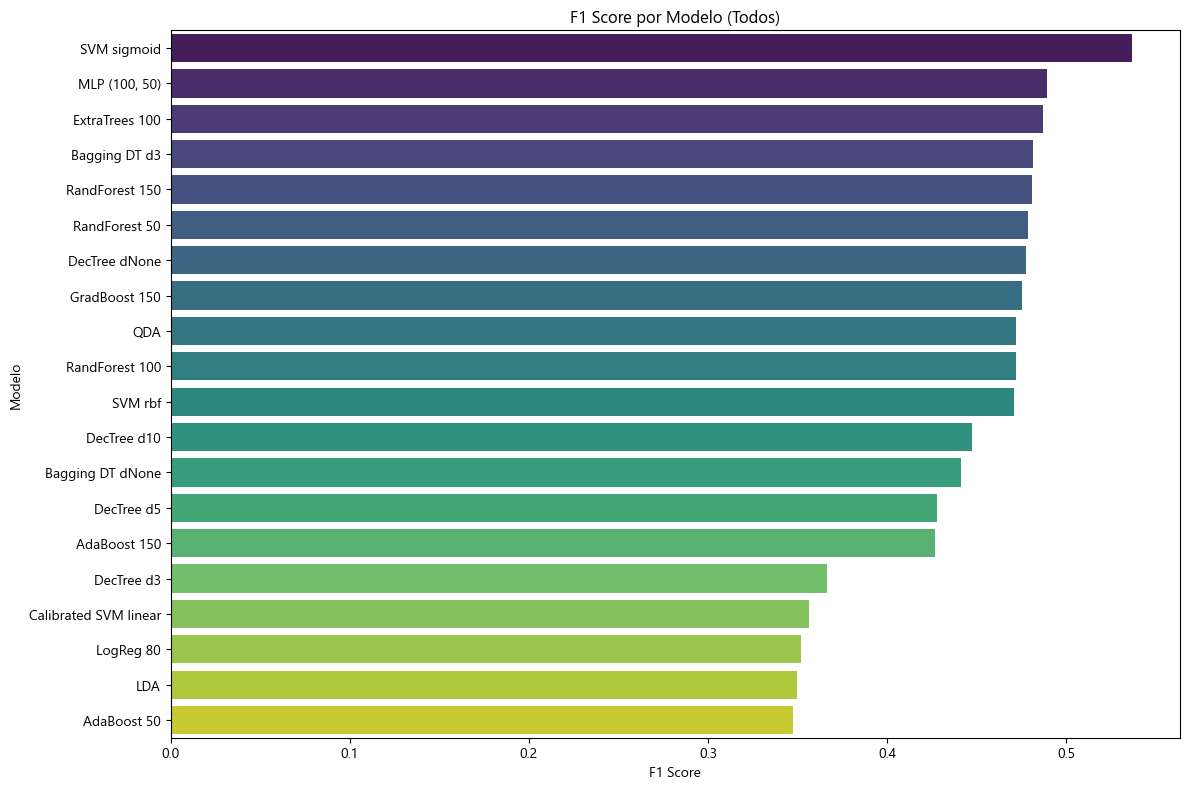

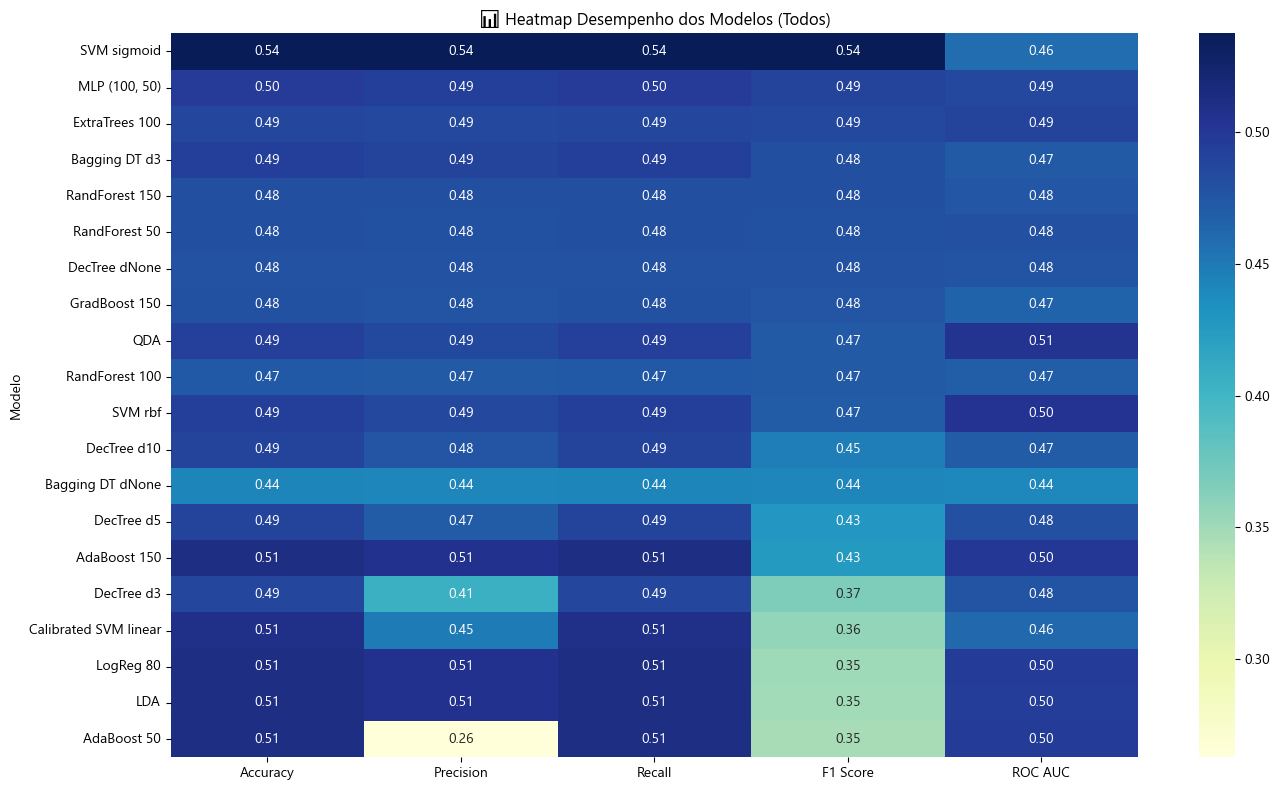

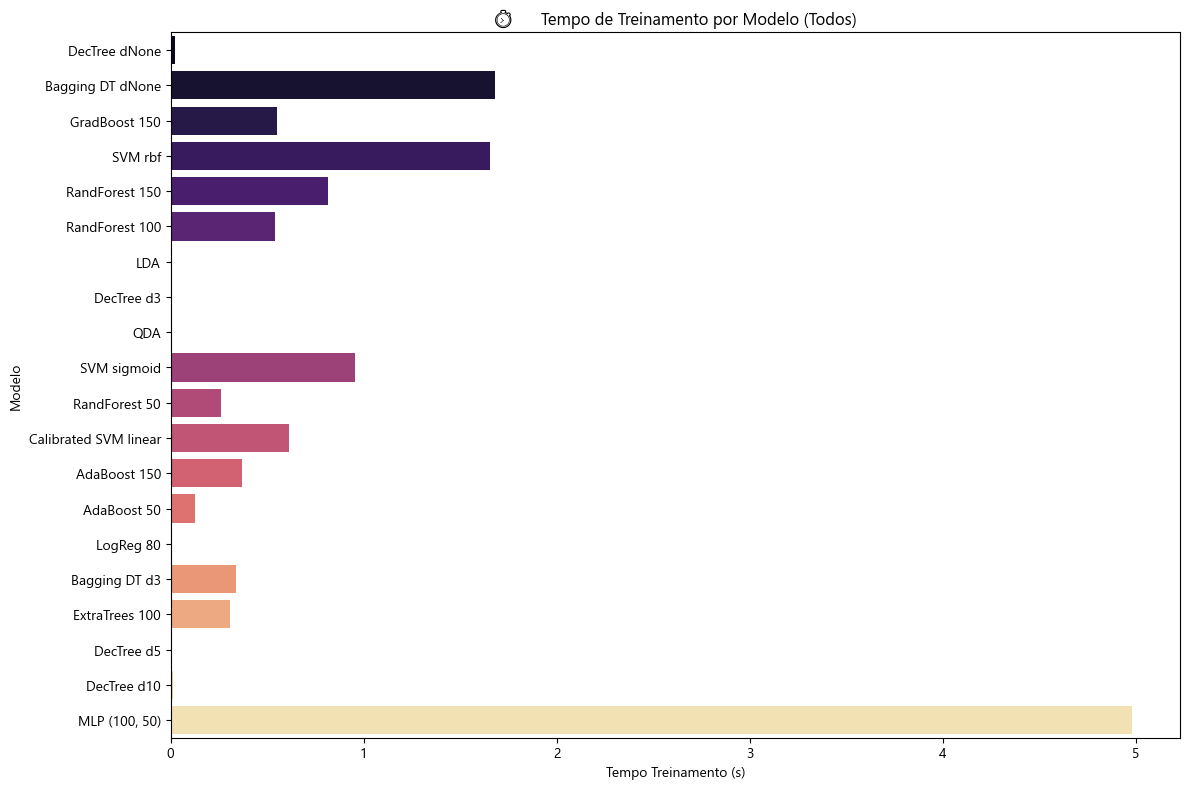

In [591]:
#📋 Comparação visual entre modelos com base em métricas de classificação

def exibir_metricas(df_resultados, df_tempos):
    # Barplot - F1 Score
    plt.figure(figsize=(12, max(6, len(df_resultados) * 0.4)))
    sns.barplot(data=df_resultados, x='F1 Score', y='Modelo', hue='Modelo', palette='viridis', legend=False)
    plt.title('F1 Score por Modelo (Todos)')
    plt.tight_layout()
    plt.show()

    # Heatmap - Todas as métricas
    plt.figure(figsize=(14, max(6, len(df_resultados) * 0.4)))
    heatmap_data = df_resultados.drop(columns='Modelo').set_index(df_resultados['Modelo']).astype(float)
    sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.2f')
    plt.title('📊 Heatmap Desempenho dos Modelos (Todos)')
    plt.rcParams['font.family'] = 'Segoe UI Emoji'
    plt.tight_layout()
    plt.show()

    # Tempo de treinamento
    plt.figure(figsize=(12, max(6, len(df_tempos) * 0.4)))
    sns.barplot(data=df_tempos, x='Tempo Treinamento (s)', y='Modelo', hue='Modelo', palette='magma', legend=False)
    plt.title('⏱️ Tempo de Treinamento por Modelo (Todos)')
    plt.rcParams['font.family'] = 'Segoe UI Emoji'
    plt.tight_layout()
    plt.show()

exibir_metricas(df_resultados, df_tempos)

🏆 Verificação e atualização dos 5 melhores modelos

Esta célula mantém um histórico dos 5 modelos com melhor desempenho com base na métrica F1 Score. Se já existir um arquivo melhores_modelos.csv, ele é carregado e combinado com os resultados atuais. A lista combinada é então ordenada, duplicatas são removidas e os 5 melhores modelos únicos são selecionados. Por fim, a nova lista é salva no mesmo arquivo CSV e os dados de tempo de treinamento são cruzados para esses modelos selecionados, preparando os resultados para visualização futura.

In [592]:
# 🏆 Verificação e atualização dos 5 melhores modelos

# 1.Salva top 5 atualizados
caminho_csv = 'melhores_modelos.csv'
if os.path.exists(caminho_csv):
    melhores_anteriores = pd.read_csv(caminho_csv)
    combinados = pd.concat([melhores_anteriores, atual_resultados], ignore_index=True)
    combinados = combinados.sort_values(by='F1 Score', ascending=False).drop_duplicates('Modelo').head(5)
else:
    combinados = atual_resultados.sort_values('F1 Score', ascending=False).head(5)

combinados.to_csv(caminho_csv, index=False)

# 2.Garante que a pasta só guarde os 5 melhores modelos
top5 = set(combinados['Modelo'])

def nome_pkl(modelo: str) -> str:
    """Converte 'Random Forest 200' -> 'RandomForest200.pkl' (mesmo padrão usado no save)."""
    return modelo.replace(' ', '') + '.pkl'

arquivos_top5 = {nome_pkl(m) for m in top5}

pasta = Path('modelos_salvos')
pasta.mkdir(exist_ok=True)

# 3.Remove os .pkl que não estão no top 5
for pkl in pasta.glob('*.pkl'):
    if pkl.name not in arquivos_top5:
        pkl.unlink()
        print(f"🗑️  Removido '{pkl.name}'.")

# 4. Cria a pasta para salvar os modelos (se não existir)
os.makedirs("modelos_salvos", exist_ok=True)

# 5. Salva somente os modelos que estão no top 5
modelos_treinados = {}
y_preds = {}
tempos = []

# 6. Cria um set com os nomes dos top 5 para facilitar a verificação
top5_modelos = set(combinados['Modelo'])

for nome, modelo in modelos:
    if nome in top5_modelos:
        nome_arquivo = f"modelos_salvos/{nome.replace(' ', '')}.pkl"
        
        # Salva modelo, scaler e label encoder juntos
        joblib.dump({
            'modelo': modelo,
            'scaler': scaler,
            'label_encoder': le  # <- Aqui está o LabelEncoder
        }, nome_arquivo)
        
        print(f"Modelo, scaler e label encoder salvos em: {nome_arquivo}")

        modelos_treinados[nome] = modelo
        y_preds[nome] = y_pred  
        tempos.append({'Modelo': nome, 'Tempo Treinamento (s)': round(duracao, 3)})

# 7. Gerar top 5 resultados e tempos atualizados
top5_resultados = combinados 
top5_tempos = df_tempos.merge(top5_resultados[['Modelo']], on='Modelo')
top5_tempos['Modelo'] = pd.Categorical(top5_tempos['Modelo'], categories=top5_resultados['Modelo'], ordered=True)

Modelo, scaler e label encoder salvos em: modelos_salvos/RandForest150.pkl
Modelo, scaler e label encoder salvos em: modelos_salvos/SVMsigmoid.pkl
Modelo, scaler e label encoder salvos em: modelos_salvos/BaggingDTd3.pkl
Modelo, scaler e label encoder salvos em: modelos_salvos/ExtraTrees100.pkl
Modelo, scaler e label encoder salvos em: modelos_salvos/MLP(100,50).pkl


📊 Visualização dos 5 melhores modelos

Esta célula gera gráficos para comparar visualmente o desempenho dos 5 melhores modelos selecionados. São exibidos:

- Um gráfico de barras do F1 Score para os top 5 modelos, facilitando a comparação direta de desempenho.
- Um heatmap com todas as métricas de avaliação para esses modelos, mostrando detalhes de performance de forma clara.
- Um gráfico de barras com o tempo de treinamento de cada modelo, para analisar o custo computacional associado a cada um.

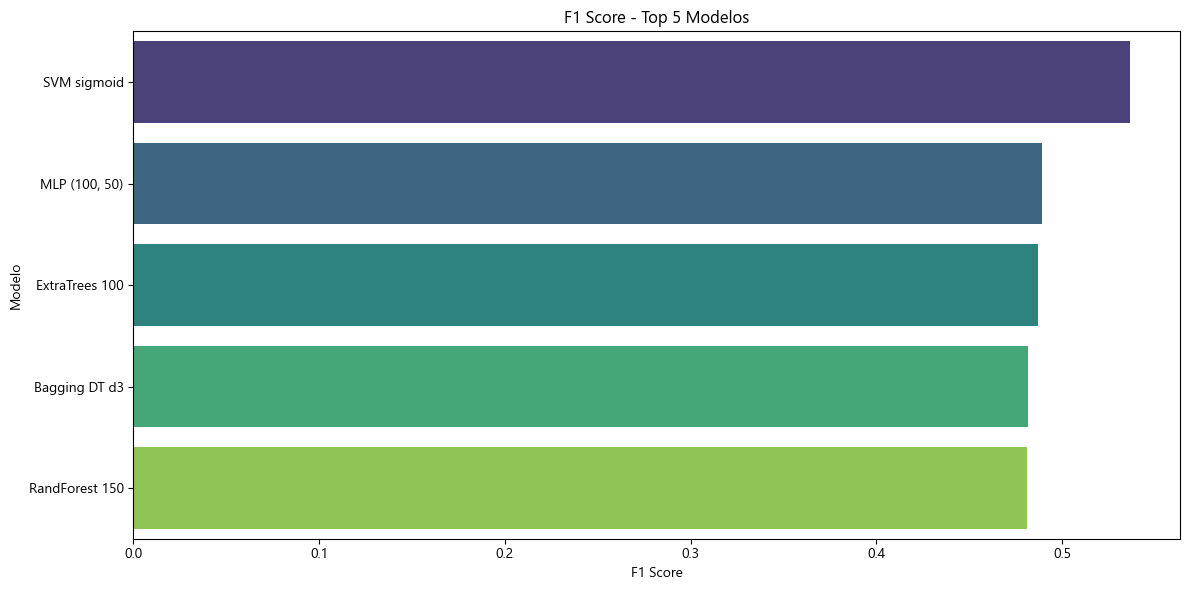

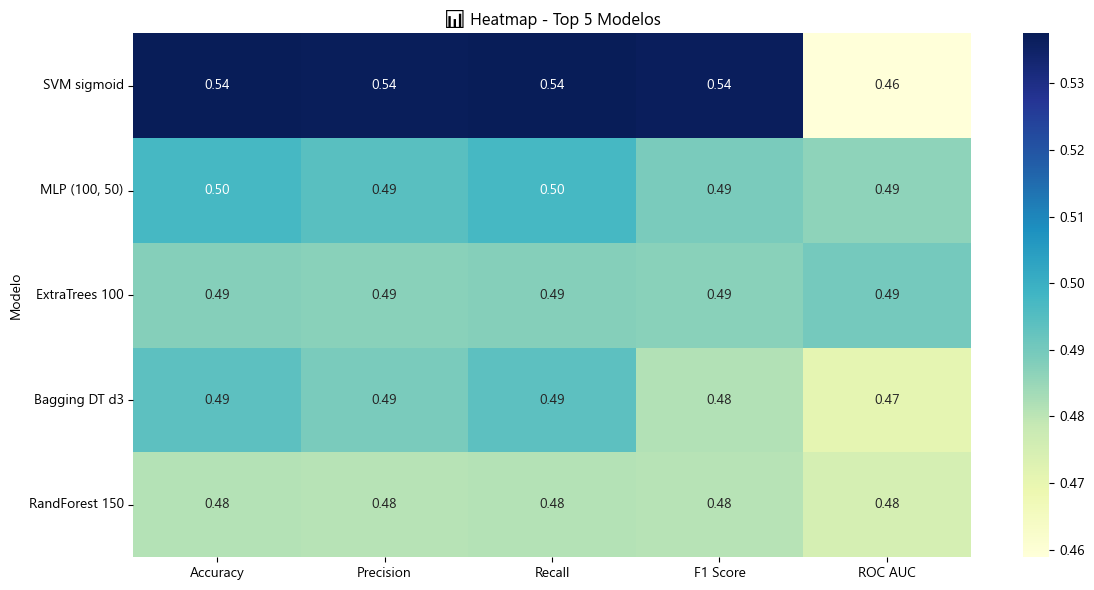

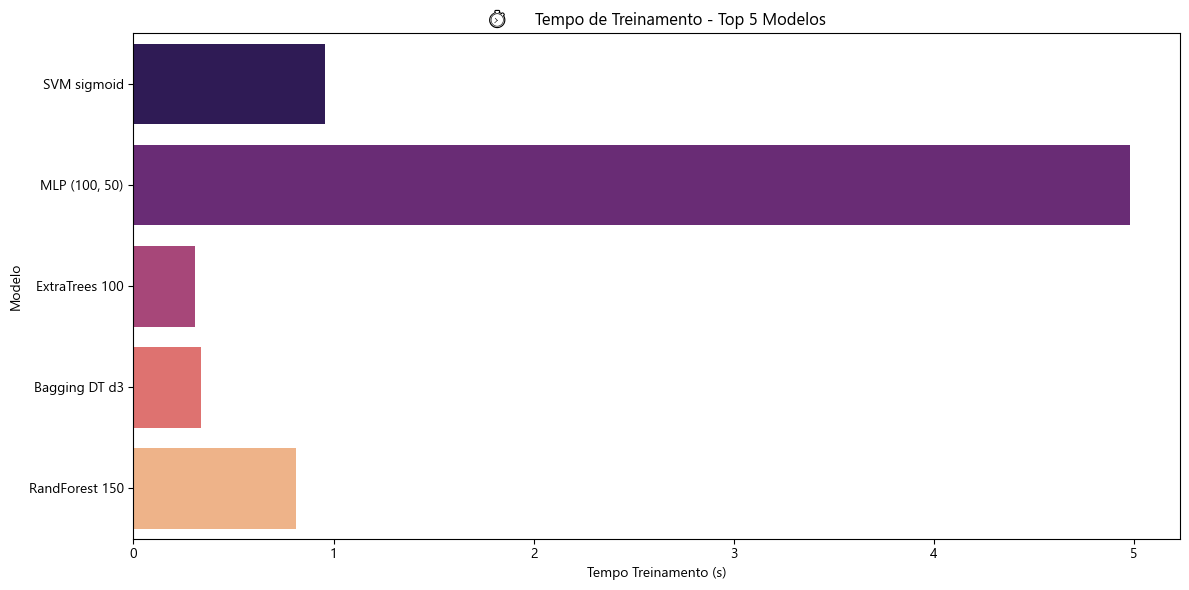

In [593]:
#📊 Visualização dos 5 melhores modelos

# F1 Score dos top 5 modelos
plt.figure(figsize=(12, 6))
sns.barplot(data=top5_resultados, x='F1 Score', y='Modelo', hue='Modelo', palette='viridis', legend=False)
plt.title('F1 Score - Top 5 Modelos')
plt.tight_layout()
plt.show()

# Heatmap dos top 5 modelos
plt.figure(figsize=(12, 6))
sns.heatmap(top5_resultados.set_index('Modelo').select_dtypes(include='number').astype(float),annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('📊 Heatmap - Top 5 Modelos')
plt.rcParams['font.family'] = 'Segoe UI Emoji'
plt.tight_layout()
plt.show()

# Gráfico de tempo dos top 5 modelos
plt.figure(figsize=(12, 6))
sns.barplot(data=top5_tempos, x='Tempo Treinamento (s)', y='Modelo', hue='Modelo', palette='magma', legend=False)
plt.title('⏱️ Tempo de Treinamento - Top 5 Modelos')
plt.rcParams['font.family'] = 'Segoe UI Emoji'
plt.tight_layout()
plt.show()

📑 Apresentação detalhada de métricas preditivas para cada algoritmo

Esta célula imprime, para cada modelo testado:

- A acurácia média da validação cruzada, que fornece uma estimativa mais robusta do desempenho geral, suavizando variações entre divisões dos dados;
- O relatório de classificação (classification_report), que mostra métricas específicas por classe (precisão, recall, f1-score), possibilitando uma avaliação mais granular da performance;
- A matriz de confusão, que evidencia os acertos e erros de classificação por categoria, sendo crucial para entender onde os modelos estão confundindo as culturas agrícolas.

Essa análise detalhada é essencial para identificar não apenas qual modelo tem melhor desempenho geral, mas também quais estão mais equilibrados entre as classes e quais podem estar cometendo erros sistemáticos.


🔍 Avaliando modelo: SVM sigmoid
✅ Acurácia: 0.4975
✅ Precisão: 0.4943
✅ Revocação: 0.4975
✅ F1-Score: 0.4892

📄 Relatório de Classificação:
              precision    recall  f1-score   support

         Não       0.51      0.62      0.56       410
         Sim       0.48      0.37      0.42       390

    accuracy                           0.50       800
   macro avg       0.49      0.49      0.49       800
weighted avg       0.49      0.50      0.49       800



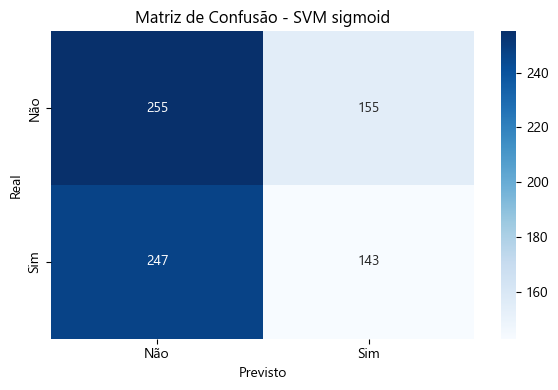


🔍 Avaliando modelo: MLP (100, 50)
✅ Acurácia: 0.4975
✅ Precisão: 0.4943
✅ Revocação: 0.4975
✅ F1-Score: 0.4892

📄 Relatório de Classificação:
              precision    recall  f1-score   support

         Não       0.51      0.62      0.56       410
         Sim       0.48      0.37      0.42       390

    accuracy                           0.50       800
   macro avg       0.49      0.49      0.49       800
weighted avg       0.49      0.50      0.49       800



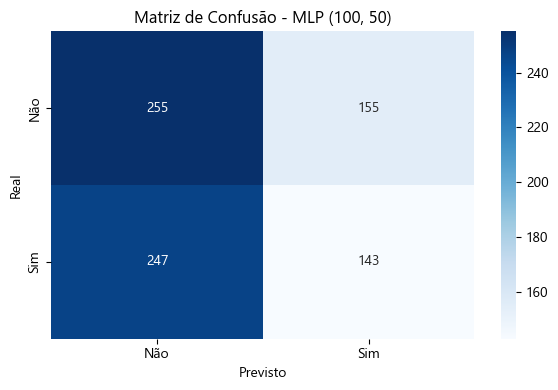


🔍 Avaliando modelo: ExtraTrees 100
✅ Acurácia: 0.4975
✅ Precisão: 0.4943
✅ Revocação: 0.4975
✅ F1-Score: 0.4892

📄 Relatório de Classificação:
              precision    recall  f1-score   support

         Não       0.51      0.62      0.56       410
         Sim       0.48      0.37      0.42       390

    accuracy                           0.50       800
   macro avg       0.49      0.49      0.49       800
weighted avg       0.49      0.50      0.49       800



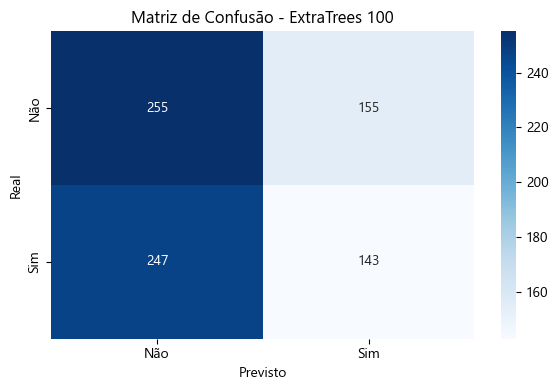


🔍 Avaliando modelo: Bagging DT d3
✅ Acurácia: 0.4975
✅ Precisão: 0.4943
✅ Revocação: 0.4975
✅ F1-Score: 0.4892

📄 Relatório de Classificação:
              precision    recall  f1-score   support

         Não       0.51      0.62      0.56       410
         Sim       0.48      0.37      0.42       390

    accuracy                           0.50       800
   macro avg       0.49      0.49      0.49       800
weighted avg       0.49      0.50      0.49       800



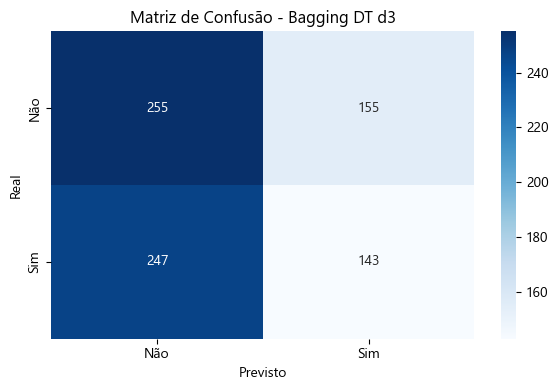


🔍 Avaliando modelo: RandForest 150
✅ Acurácia: 0.4975
✅ Precisão: 0.4943
✅ Revocação: 0.4975
✅ F1-Score: 0.4892

📄 Relatório de Classificação:
              precision    recall  f1-score   support

         Não       0.51      0.62      0.56       410
         Sim       0.48      0.37      0.42       390

    accuracy                           0.50       800
   macro avg       0.49      0.49      0.49       800
weighted avg       0.49      0.50      0.49       800



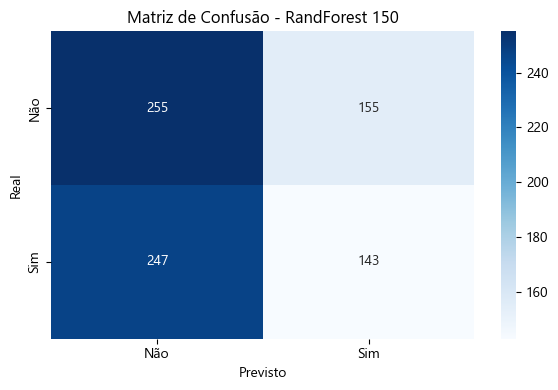

In [594]:
#📑 Apresentação detalhada de métricas preditivas para cada algoritmo

for nome in top5_resultados['Modelo']:
    print(f"\n🔍 Avaliando modelo: {nome}")

    # Tenta obter o modelo: da memória ou do disco
    if nome in modelos_treinados:
        modelo = modelos_treinados[nome]
    else:
        try:
            caminho_modelo = f"modelos_salvos/{nome}.pkl"
            modelo = joblib.load(caminho_modelo)
            print(f"📂 Modelo '{nome}' carregado do disco com sucesso.")
        except FileNotFoundError:
            print(f"❌ Modelo '{nome}' não foi treinado nesta execução e também não foi encontrado em disco.")
            continue  # neste caso, não tem como avaliar

    # Tenta obter as previsões
    if nome in y_preds:
        y_pred = y_preds[nome]
    else:
        y_pred = modelo.predict(X_test)
        y_preds[nome] = y_pred  # salva para reutilização, se necessário
        
        
    # Avaliação
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"✅ Acurácia: {acc:.4f}")
    print(f"✅ Precisão: {prec:.4f}")
    print(f"✅ Revocação: {rec:.4f}")
    print(f"✅ F1-Score: {f1:.4f}")

    # Relatório de classificação
    print("\n📄 Relatório de Classificação:")
    print(classification_report(y_test, y_pred, target_names=le.classes_, zero_division=0))

    # Matriz de confusão
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f"Matriz de Confusão - {nome}")
    plt.xlabel("Previsto")
    plt.ylabel("Real")
    plt.tight_layout()
    plt.show()

📊 Definição dos grids de hiperparâmetros para otimização dos modelos selecionados

Esta célula apresenta os parâmetros a serem explorados no processo de busca em grid (GridSearchCV) para cada classificador, permitindo a escolha automática dos melhores hiperparâmetros com base na métrica de avaliação definida.

Para cada modelo, foram selecionados hiperparâmetros relevantes que influenciam diretamente o desempenho e a capacidade de generalização, como:

- **LogisticRegression:** penalização, força da regularização (C), solver e número máximo de iterações;
- **DecisionTreeClassifier:** profundidade máxima, tamanho mínimo para divisão e número mínimo de amostras por folha;
- **RandomForestClassifier, ExtraTreesClassifier:** número de árvores, profundidade, amostragem e parâmetros de divisão;
- **GradientBoostingClassifier e AdaBoostClassifier:** número de estimadores, taxa de aprendizado, profundidade e subsampling;
- **SVC:** tipos de kernel, parâmetro de regularização (C), coeficiente gamma e grau do polinômio;
- **KNeighborsClassifier:** número de vizinhos, esquema de ponderação e métrica de distância;
- **Modelos com poucos hiperparâmetros (GaussianNB, LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis):** parâmetros básicos para regularização e solver;
- **MLPClassifier:** arquitetura da rede, função de ativação, solver, parâmetro de regularização (alpha), taxa de aprendizado e número máximo de iterações;
- **BaggingClassifier:** número de estimadores, proporções de amostras e características usadas, tipo de bootstrap e profundidade da árvore base;
- **CalibratedClassifierCV:** método de calibração e folds da validação cruzada.

Essa definição é fundamental para a aplicação da metodologia de otimização de hiperparâmetros, garantindo uma busca ampla e eficiente para identificar a melhor configuração para cada algoritmo no contexto da classificação dos dados.

In [595]:
# Definição dos grids de hiperparâmetros para alguns modelos selecionados como exemplo
param_grids = {
    'LogisticRegression': {
        'C': [0.01, 0.1, 1, 10],
        'penalty': ['l2'],
        'solver': ['lbfgs', 'liblinear'],
        'max_iter': [500, 1000, 2000]
    },

    'DecisionTreeClassifier': {
        'max_depth': [None, 3, 5, 10, 15],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },

    'RandomForestClassifier': {
        'n_estimators': [50, 100, 150, 200],
        'max_depth': [None, 3, 5, 10],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'bootstrap': [True, False]
    },

    'GradientBoostingClassifier': {
        'n_estimators': [50, 100, 150, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 10],
        'subsample': [0.6, 0.8, 1.0]
    },

    'ExtraTreesClassifier': {
        'n_estimators': [50, 100, 150, 200],
        'max_depth': [None, 3, 5, 10],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'bootstrap': [True, False]
    },

    'AdaBoostClassifier': {
        'n_estimators': [50, 100, 150, 200],
        'learning_rate': [0.01, 0.1, 1.0]
    },

    'SVC': {
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto'],
        'degree': [3, 4, 5]  # só usado para poly
    },

    'KNeighborsClassifier': {
        'n_neighbors': [3, 5, 7, 10, 15],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },

    'GaussianNB': {
        # Quase não tem hiperparâmetros, fica vazio
    },

    'LinearDiscriminantAnalysis': {
        'solver': ['svd', 'lsqr', 'eigen'],
        'shrinkage': [None, 'auto']
    },

    'QuadraticDiscriminantAnalysis': {
        'reg_param': [0.0, 0.1, 0.5, 1.0]
    },

    'MLPClassifier': {
        'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
        'activation': ['relu', 'tanh', 'logistic'],
        'solver': ['adam', 'sgd'],
        'alpha': [0.0001, 0.001, 0.01],
        'learning_rate': ['constant', 'adaptive'],
        'max_iter': [500, 1000, 2000]
    },

    'BaggingClassifier': {
        'n_estimators': [10, 50, 100],
        'max_samples': [0.5, 0.8, 1.0],
        'max_features': [0.5, 0.8, 1.0],
        'bootstrap': [True, False],
        'bootstrap_features': [True, False],
        # estimator é DecisionTree, ajuste para max_depth dele
        'base_estimator__max_depth': [None, 3, 5, 10]
    },

    'CalibratedClassifierCV': {
        'method': ['sigmoid', 'isotonic'],
        'cv': [3, 5, 10]
    }
}

📈 Visualização da distribuição das classes no conjunto de teste

Esta célula gera uma tabela que mostra a contagem de amostras para cada classe no conjunto de teste, após a inversão da codificação realizada pelo label encoder (le).

- A transformação inversa permite visualizar as classes em seus nomes originais;
- O uso de `value_counts()` calcula a frequência de cada classe no conjunto de teste;
- O resultado é organizado em um DataFrame, com as classes e suas respectivas contagens;
- A ordenação decrescente destaca as classes mais frequentes, facilitando a análise do balanceamento do dataset.

Essa visualização é importante para entender a representatividade de cada classe na fase de teste e para verificar possíveis desequilíbrios que possam afetar a avaliação dos modelos.

In [596]:
#📈 Visualização da distribuição das classes no conjunto de teste

pd.DataFrame(le.inverse_transform(y_test)) \
    .value_counts() \
    .reset_index(name='count') \
    .rename(columns={'index': 'label'}) \
    .sort_values(by='count', ascending=False)

,0,count
0,Não,410
1,Sim,390


⚙️ Otimização de hiperparâmetros com GridSearchCV para os modelos selecionados

Esta célula realiza o ajuste dos hiperparâmetros dos modelos por meio de busca em grade com validação cruzada, buscando a melhor combinação para maximizar a métrica F1 ponderada. Para cada modelo disponível com grid definido, a otimização é executada, considerando parâmetros específicos quando necessário, como no caso do BaggingClassifier. O tempo de execução do processo é registrado para análise do custo computacional. Após encontrar a melhor configuração, o modelo otimizado é avaliado no conjunto de teste por métricas como acurácia, precisão, recall, F1-score e ROC AUC (quando aplicável). Os resultados, modelos ajustados e tempos são armazenados para comparação. Modelos sem grids definidos são automaticamente ignorados, mantendo o foco apenas nos que permitem otimização. Este procedimento é essencial para garantir o melhor desempenho possível de cada classificador no problema em questão.

In [597]:
#📈 Otimização de hiperparâmetros com GridSearchCV para os modelos selecionados

modelos_otimizados = []
resultados_otimizados = []
tempos_otimizados = []

for nome, modelo in modelos:
    print(f"\nIniciando otimização para: {nome}")
    modelo_classe = modelo.__class__.__name__
    
    if modelo_classe in param_grids:
        param_grid = param_grids[modelo_classe].copy()

        # Ajuste para BaggingClassifier
        if modelo_classe == 'BaggingClassifier':
            param_grid = {k.replace('base_estimator__', 'estimator__'): v for k, v in param_grid.items()}
        
        # Ajuste para CalibratedClassifierCV
        if modelo_classe == 'CalibratedClassifierCV':
            continue  

        grid_search = GridSearchCV(
            estimator=modelo,
            param_grid=param_grid,
            scoring='f1_weighted',
            cv=cv,
            n_jobs=-1,
            verbose=2
        )

        inicio = time.time()
        grid_search.fit(X_train, y_train)
        fim = time.time()

        melhor_modelo = grid_search.best_estimator_
        duracao = fim - inicio

        print(f"Melhores parâmetros para {nome}: {grid_search.best_params_}")
        print(f"Tempo otimização: {duracao:.2f} segundos")
        
        # Avaliação no conjunto de teste
        y_pred = melhor_modelo.predict(X_test)

        try:
            y_proba = melhor_modelo.predict_proba(X_test)
            if len(set(y_enc)) == 2:
                auc = roc_auc_score(y_test, y_proba[:, 1])
            else:
                auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
        except Exception:
            auc = None

        resultados_otimizados.append({
            'Modelo': nome + " (Otimizado)",
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred, average='weighted', zero_division=0),
            'Recall': recall_score(y_test, y_pred, average='weighted'),
            'F1 Score': f1_score(y_test, y_pred, average='weighted'),
            'ROC AUC': auc
        })

        modelos_otimizados.append((nome, melhor_modelo)) 
        tempos_otimizados.append({'Modelo': nome + " (Otimizado)", 'Tempo Otimização + Treino (s)': round(duracao, 3)})

    else:
        print(f"Sem grid definido para {nome} (tipo {modelo_classe}), pulando otimização.")


Iniciando otimização para: DecTree dNone
Fitting 5 folds for each of 45 candidates, totalling 225 fits
Melhores parâmetros para DecTree dNone: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Tempo otimização: 3.52 segundos

Iniciando otimização para: Bagging DT dNone
Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Melhores parâmetros para Bagging DT dNone: {'bootstrap': False, 'bootstrap_features': False, 'estimator__max_depth': None, 'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 100}
Tempo otimização: 82.76 segundos

Iniciando otimização para: GradBoost 150
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Melhores parâmetros para GradBoost 150: {'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 150, 'subsample': 0.6}
Tempo otimização: 65.03 segundos

Iniciando otimização para: SVM rbf
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Melhores parâmetros para SVM rbf: {'C': 1, 'degree': 3, 'gamma': 'scale', '

c:\Users\alice\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning:


5 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\alice\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\alice\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\alice\AppData

Melhores parâmetros para DecTree d3: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 10}
Tempo otimização: 0.42 segundos

Iniciando otimização para: QDA
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Melhores parâmetros para QDA: {'reg_param': 0.0}
Tempo otimização: 0.04 segundos

Iniciando otimização para: SVM sigmoid
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Melhores parâmetros para SVM sigmoid: {'C': 1, 'degree': 3, 'gamma': 'scale', 'kernel': 'sigmoid'}
Tempo otimização: 70.91 segundos

Iniciando otimização para: RandForest 50
Fitting 5 folds for each of 128 candidates, totalling 640 fits
Melhores parâmetros para RandForest 50: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Tempo otimização: 31.40 segundos

Iniciando otimização para: Calibrated SVM linear

Iniciando otimização para: AdaBoost 150
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Melhores parâmetros pa

✅ Visualização dos modelos otimizados

Nesta célula, são construídos DataFrames com os resultados das métricas de desempenho e os tempos de treinamento dos modelos otimizados. Os resultados são ordenados pelo F1 Score em ordem decrescente para destacar os melhores desempenhos. A função `exibir_metricas` é então chamada para apresentar essas informações de forma clara e organizada, facilitando a análise comparativa entre os modelos após a otimização dos hiperparâmetros. Essa visualização é fundamental para identificar quais algoritmos otimizados alcançaram o melhor equilíbrio entre eficiência e eficácia na classificação.

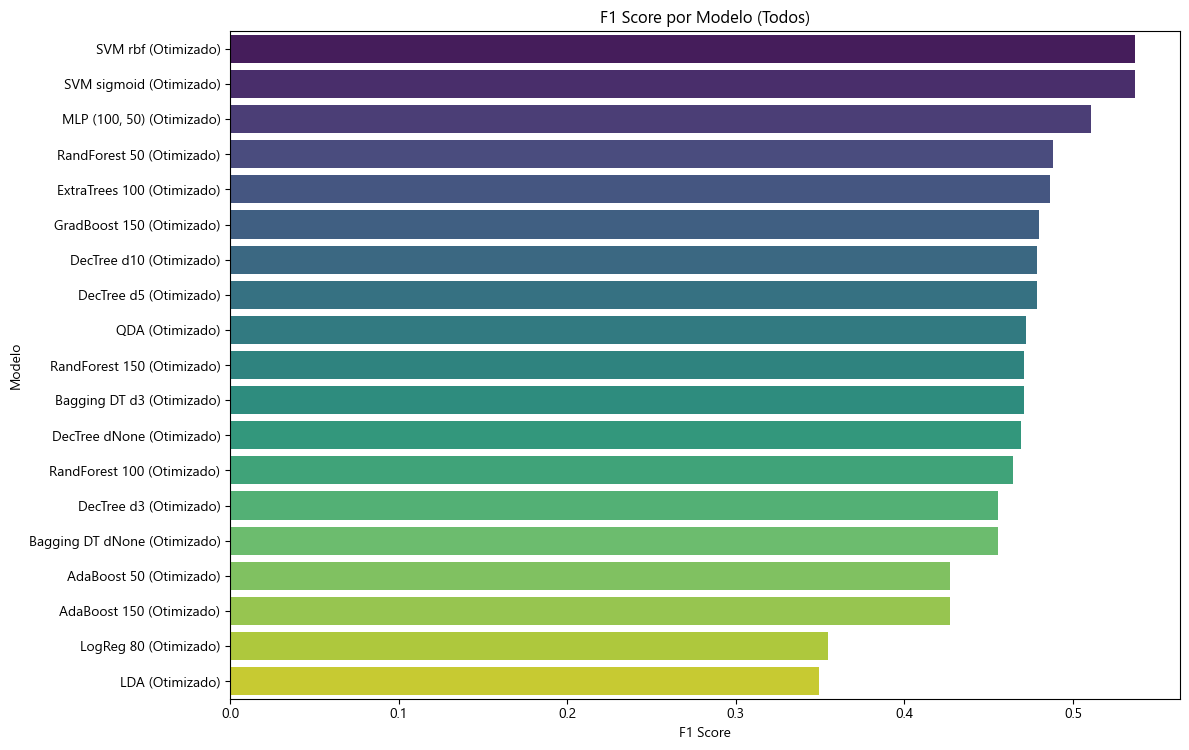

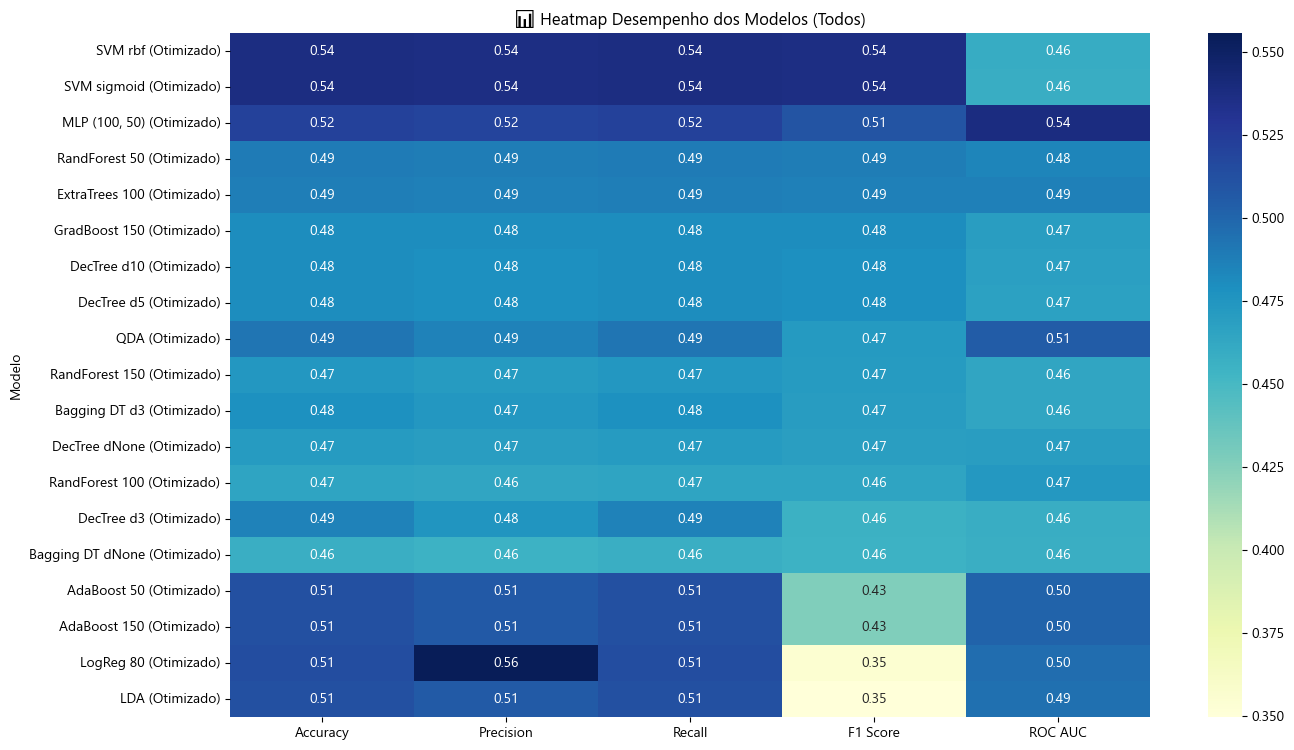

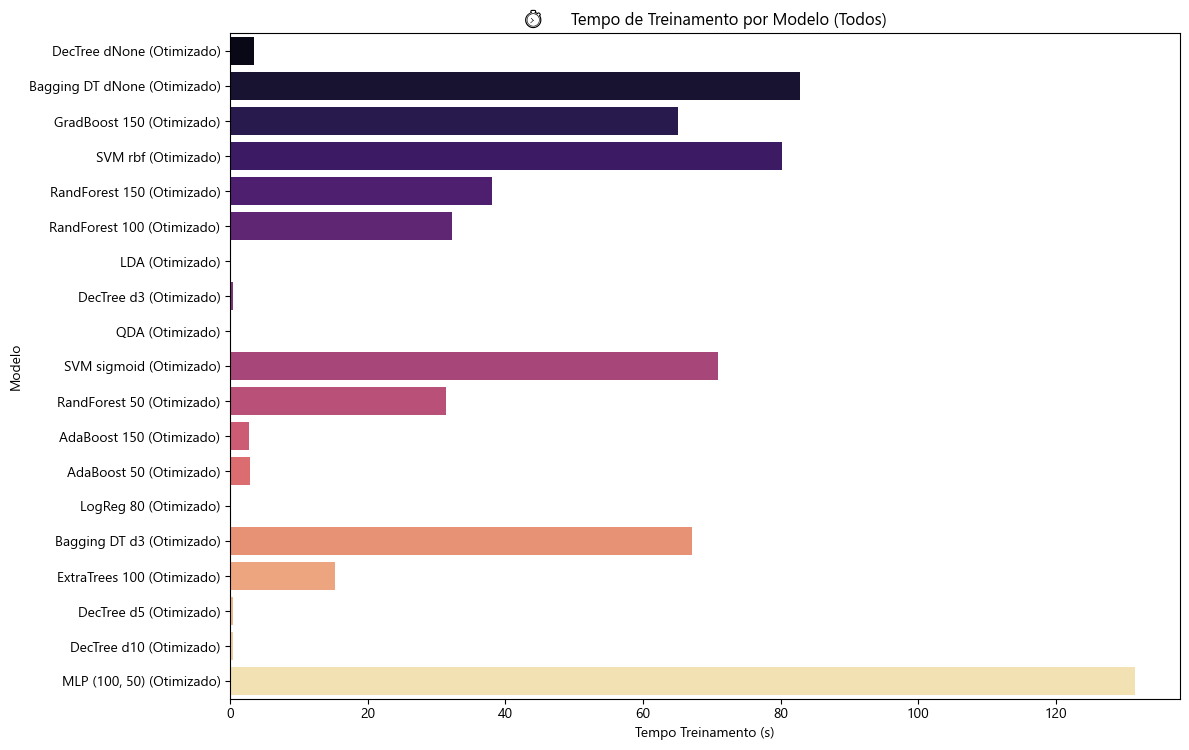

In [598]:
    # ✅ Visualização dos modelos otimizados
    
# Construção dos DataFrames
df_resultados_otimizados = pd.DataFrame(resultados_otimizados).sort_values(by='F1 Score', ascending=False)
df_tempos_otimizados = pd.DataFrame(tempos_otimizados).rename(columns={"Tempo Otimização + Treino (s)": "Tempo Treinamento (s)"})

# Visualização
exibir_metricas(df_resultados_otimizados, df_tempos_otimizados)

🔁 Reavaliação dos modelos otimizados com os melhores hiperparâmetros encontrados

Esta célula executa o re-treinamento e avaliação dos modelos já otimizados utilizando os melhores hiperparâmetros encontrados anteriormente. Cada modelo é ajustado novamente aos dados de treino e avaliado no conjunto de teste, medindo as métricas de acurácia, precisão, recall, F1-score e ROC AUC (quando aplicável). O tempo gasto para treinar e prever também é registrado para análise do custo computacional. Os resultados, os modelos treinados e as previsões são armazenados para uso posterior. Esse processo é importante para validar o desempenho dos modelos já otimizados e garantir a consistência dos resultados.

In [599]:
#🔁 Reavaliação dos modelos otimizados com os melhores hiperparâmetros encontrados

resultados_otimizados = []
tempos_otimizados = []
modelos_otimizados_treinados = {}
y_preds_otimizados = {}

for nome, modelo_otimizado in modelos_otimizados:
    print(f"🔧 Reavaliando: {nome}")
    inicio = time.time()

    modelo_otimizado.fit(X_train, y_train)
    y_pred = modelo_otimizado.predict(X_test)

    fim = time.time()
    duracao = fim - inicio

    try:
        y_proba = modelo_otimizado.predict_proba(X_test)
        if len(set(y)) == 2:
            auc = roc_auc_score(y_test, y_proba[:, 1])
        else:
            auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
    except:
        auc = None

    resultados_otimizados.append({
        'Modelo': nome,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted', zero_division=0),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted'),
        'ROC AUC': auc
    })

    modelos_otimizados_treinados[nome] = modelo_otimizado
    y_preds_otimizados[nome] = y_pred
    tempos_otimizados.append({'Modelo': nome, 'Tempo Treinamento (s)': round(duracao, 3)})

🔧 Reavaliando: DecTree dNone
🔧 Reavaliando: Bagging DT dNone
🔧 Reavaliando: GradBoost 150
🔧 Reavaliando: SVM rbf
🔧 Reavaliando: RandForest 150
🔧 Reavaliando: RandForest 100
🔧 Reavaliando: LDA
🔧 Reavaliando: DecTree d3
🔧 Reavaliando: QDA
🔧 Reavaliando: SVM sigmoid
🔧 Reavaliando: RandForest 50
🔧 Reavaliando: AdaBoost 150
🔧 Reavaliando: AdaBoost 50
🔧 Reavaliando: LogReg 80
🔧 Reavaliando: Bagging DT d3
🔧 Reavaliando: ExtraTrees 100
🔧 Reavaliando: DecTree d5
🔧 Reavaliando: DecTree d10
🔧 Reavaliando: MLP (100, 50)


📊 Organização dos resultados otimizados

Nesta célula, os resultados das métricas de desempenho e os tempos de treinamento dos modelos otimizados são organizados em DataFrames, que são ordenados pelo F1 Score de forma decrescente para destacar os modelos com melhor performance. Em seguida, a função `exibir_metricas` é utilizada para apresentar essas informações de forma visual e intuitiva, facilitando a comparação e análise dos modelos otimizados. Essa organização permite uma avaliação clara e objetiva do impacto da otimização dos hiperparâmetros sobre o desempenho dos classificadores.

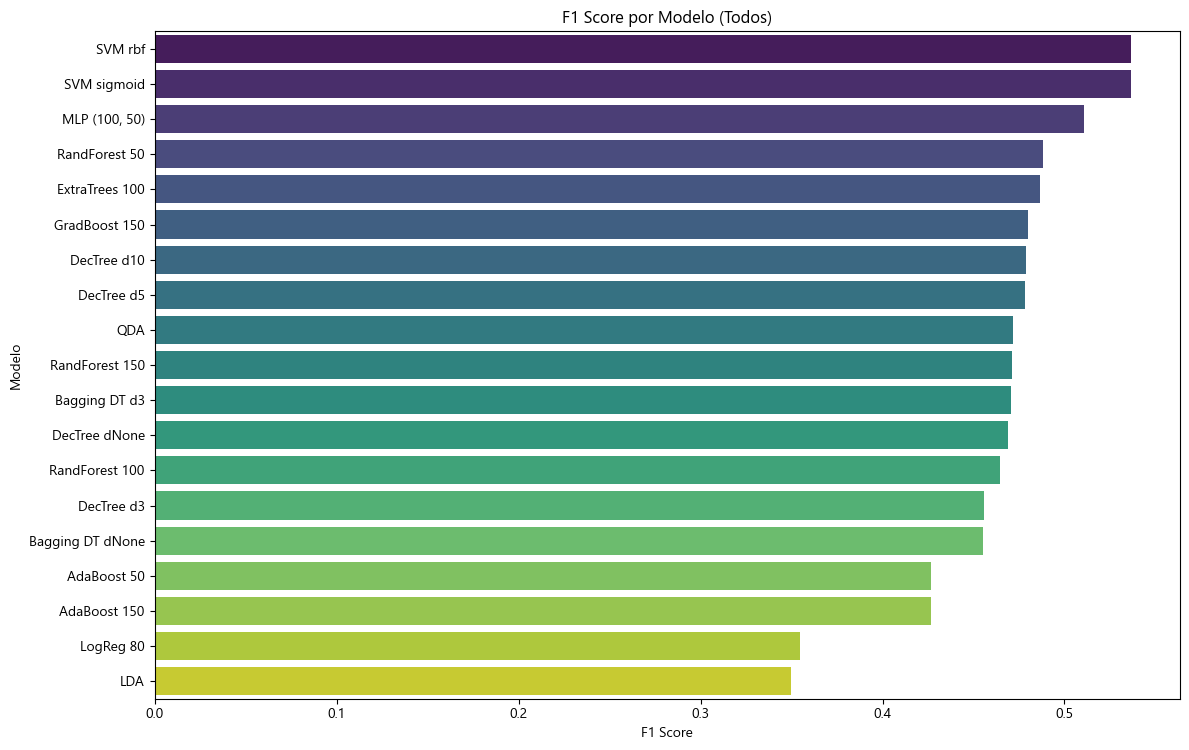

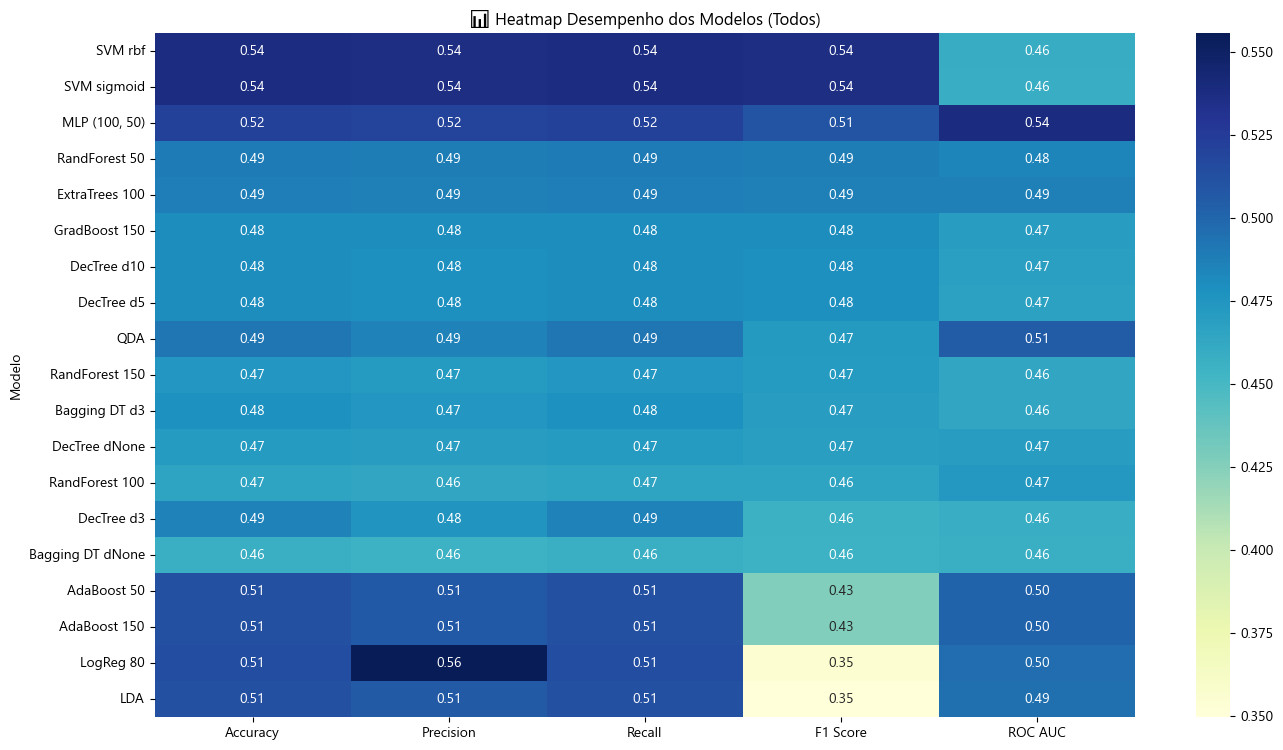

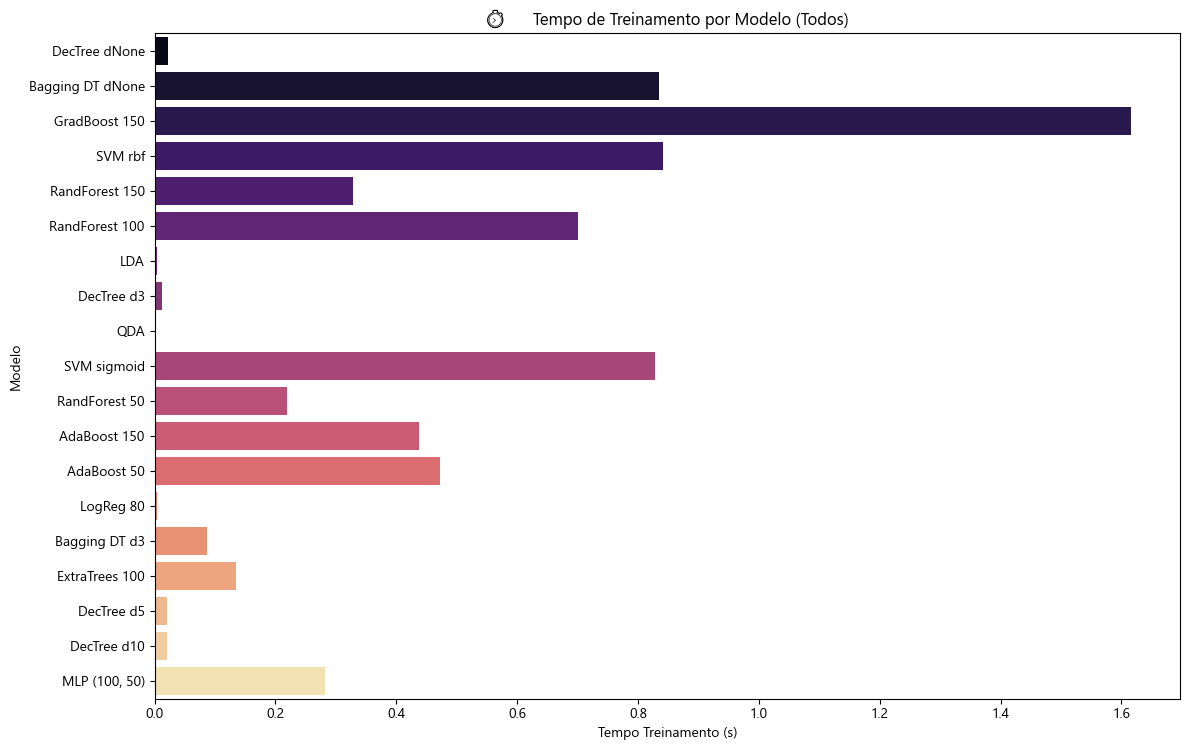

In [600]:
#📊 Organização dos resultados otimizados

df_resultados_otimizados = pd.DataFrame(resultados_otimizados).sort_values(by='F1 Score', ascending=False)
df_tempos_otimizados = pd.DataFrame(tempos_otimizados)

# Visualizações
exibir_metricas(df_resultados_otimizados, df_tempos_otimizados)

🏆 Atualização do top 5 com os modelos otimizados

Esta célula realiza a atualização do ranking dos cinco melhores modelos considerando os resultados atuais de otimização. Caso exista um arquivo CSV com os melhores modelos anteriores, ele é carregado e combinado com os novos resultados, garantindo a manutenção dos melhores desempenhos sem duplicatas. O ranking é então reordenado pelo F1 Score e os top 5 são selecionados para salvamento. Os modelos correspondentes a essas cinco melhores configurações são armazenados localmente em formato `.pkl`, garantindo a persistência dos classificadores otimizados para uso futuro. Essa etapa é essencial para consolidar os melhores resultados obtidos e facilitar a reutilização dos modelos.

In [601]:
#🏆 Atualização do top 5 com os otimizados

# 1.Salva top 5 atualizados
caminho_csv = 'melhores_modelos_otimizados.csv'
if os.path.exists(caminho_csv):
    melhores_anteriores = pd.read_csv(caminho_csv)
    combinados = pd.concat([melhores_anteriores, df_resultados_otimizados], ignore_index=True)
    combinados = combinados.sort_values(by='F1 Score', ascending=False).drop_duplicates('Modelo').head(5)
else:
    combinados = df_resultados_otimizados.head(5)

combinados.to_csv(caminho_csv, index=False)

# 2.Garante que a pasta só guarde os 5 melhores modelos
top5 = set(combinados['Modelo'])

def nome_pkl(modelo: str) -> str:
    """Converte 'Random Forest 200' -> 'RandomForest200.pkl' (mesmo padrão usado no save)."""
    return modelo.replace(' ', '') + '.pkl'

arquivos_top5_otimizados = {nome_pkl(m) for m in top5}

pasta = Path('modelos_otimizados_salvos')
pasta.mkdir(exist_ok=True)

# 3.Remove os .pkl que não estão no top 5
for pkl in pasta.glob('*.pkl'):
    if pkl.name not in arquivos_top5:
        pkl.unlink()
        print(f"🗑️  Removido '{pkl.name}'.")

# 4.Constrói dicionário top 5, buscando no disco se não estiver em memória
top5_otimizados = {}
modelos_faltantes = []  # <- guardará nomes que não existem mais

for nome in combinados['Modelo']:
    if nome in modelos_otimizados_treinados:
        # Já está em memória
        top5_otimizados[nome] = modelos_otimizados_treinados[nome]
    else:
        # Tenta carregar a versão salva em disco (caso tenha sido top‑5 de execuções anteriores)
        caminho = f"modelos_otimizados_salvos/{nome.replace(' ', '_')}.pkl"
        if os.path.exists(caminho):
            top5_otimizados[nome] = joblib.load(caminho)
            print(f"📂 Modelo '{nome}' carregado do disco.")
        else:
            print(f"⚠️  Modelo '{nome}' não encontrado em memória nem no disco — removido do top 5.")
            modelos_faltantes.append(nome)   # <‑ registra ausência

# 5.Remove do DataFrame 'combinados' o que não existe mais
if modelos_faltantes:
    combinados = (
        combinados[~combinados['Modelo'].isin(modelos_faltantes)]
        .reset_index(drop=True)
    )

# 6.Salva os 5 melhores modelos otimizados
os.makedirs("modelos_otimizados_salvos", exist_ok=True)

modelos_treinados = {}
y_preds = {}
tempos = []

# 7.Cria um set com os nomes dos top 5 para facilitar a verificação
top5_modelos = set(combinados['Modelo'])

for nome, modelo in modelos:
    if nome in top5_modelos:
        nome_arquivo = f"modelos_otimizados_salvos/{nome.replace(' ', '')}.pkl"
        
        # Salva modelo, scaler e label encoder juntos
        joblib.dump({
            'modelo': modelo,
            'scaler': scaler,
            'label_encoder': le  # <- Aqui está o LabelEncoder
        }, nome_arquivo)
        
        print(f"Modelo, scaler e label encoder salvos em: {nome_arquivo}")

        modelos_treinados[nome] = modelo
        y_preds[nome] = y_pred  
        tempos.append({'Modelo': nome, 'Tempo Treinamento (s)': round(duracao, 3)})

# 7.Gera top 5 resultados e tempos atualizados
top5_resultados = combinados 
top5_tempos = df_tempos.merge(top5_resultados[['Modelo']], on='Modelo')
top5_tempos['Modelo'] = pd.Categorical(top5_tempos['Modelo'], categories=top5_resultados['Modelo'], ordered=True)

Modelo, scaler e label encoder salvos em: modelos_otimizados_salvos/SVMrbf.pkl
Modelo, scaler e label encoder salvos em: modelos_otimizados_salvos/SVMsigmoid.pkl
Modelo, scaler e label encoder salvos em: modelos_otimizados_salvos/RandForest50.pkl
Modelo, scaler e label encoder salvos em: modelos_otimizados_salvos/ExtraTrees100.pkl
Modelo, scaler e label encoder salvos em: modelos_otimizados_salvos/MLP(100,50).pkl


📄 Avaliação detalhada dos top 5 modelos otimizados

Esta célula realiza uma avaliação completa dos cinco melhores modelos otimizados, apresentando métricas de desempenho e visualizações que facilitam a análise detalhada da performance de cada classificador. Para cada modelo, seja carregado da memória ou do disco, são exibidas as métricas principais — acurácia, precisão, recall e F1-Score — seguidas pelo relatório de classificação que detalha essas métricas por classe. Além disso, é gerada a matriz de confusão em forma de heatmap, permitindo identificar padrões de acertos e erros entre as classes. Essa avaliação detalhada é fundamental para compreender o comportamento dos modelos nos dados de teste e identificar pontos fortes e limitações de cada um.


🔍 Avaliando modelo otimizado: SVM rbf
✅ Acurácia: 0.5375
✅ Precisão: 0.5369
✅ Recall: 0.5375
✅ F1-Score: 0.5366

📄 Relatório de Classificação:
              precision    recall  f1-score   support

         Não       0.55      0.58      0.56       410
         Sim       0.53      0.49      0.51       390

    accuracy                           0.54       800
   macro avg       0.54      0.54      0.54       800
weighted avg       0.54      0.54      0.54       800



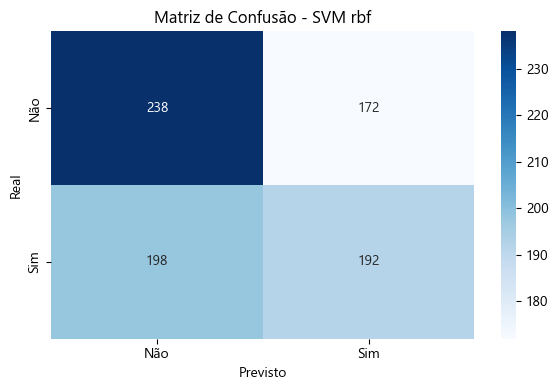


🔍 Avaliando modelo otimizado: SVM sigmoid
✅ Acurácia: 0.5375
✅ Precisão: 0.5369
✅ Recall: 0.5375
✅ F1-Score: 0.5366

📄 Relatório de Classificação:
              precision    recall  f1-score   support

         Não       0.55      0.58      0.56       410
         Sim       0.53      0.49      0.51       390

    accuracy                           0.54       800
   macro avg       0.54      0.54      0.54       800
weighted avg       0.54      0.54      0.54       800



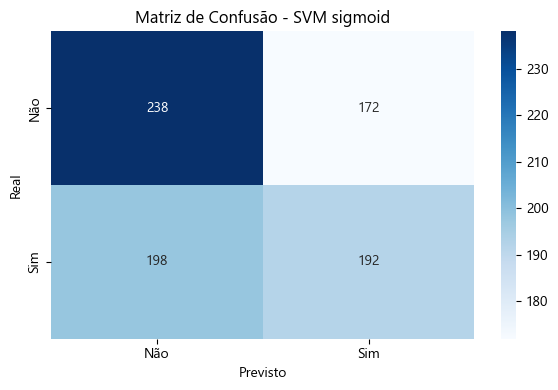


🔍 Avaliando modelo otimizado: MLP (100, 50)
✅ Acurácia: 0.5212
✅ Precisão: 0.5194
✅ Recall: 0.5212
✅ F1-Score: 0.5105

📄 Relatório de Classificação:
              precision    recall  f1-score   support

         Não       0.53      0.67      0.59       410
         Sim       0.51      0.37      0.43       390

    accuracy                           0.52       800
   macro avg       0.52      0.52      0.51       800
weighted avg       0.52      0.52      0.51       800



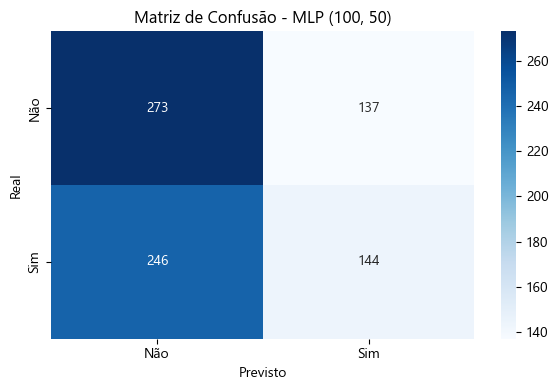


🔍 Avaliando modelo otimizado: RandForest 50
✅ Acurácia: 0.4888
✅ Precisão: 0.4883
✅ Recall: 0.4888
✅ F1-Score: 0.4883

📄 Relatório de Classificação:
              precision    recall  f1-score   support

         Não       0.50      0.52      0.51       410
         Sim       0.47      0.46      0.47       390

    accuracy                           0.49       800
   macro avg       0.49      0.49      0.49       800
weighted avg       0.49      0.49      0.49       800



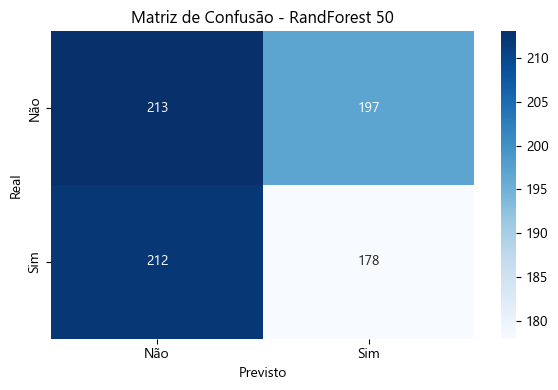


🔍 Avaliando modelo otimizado: ExtraTrees 100
✅ Acurácia: 0.4875
✅ Precisão: 0.4866
✅ Recall: 0.4875
✅ F1-Score: 0.4865

📄 Relatório de Classificação:
              precision    recall  f1-score   support

         Não       0.50      0.53      0.52       410
         Sim       0.47      0.44      0.46       390

    accuracy                           0.49       800
   macro avg       0.49      0.49      0.49       800
weighted avg       0.49      0.49      0.49       800



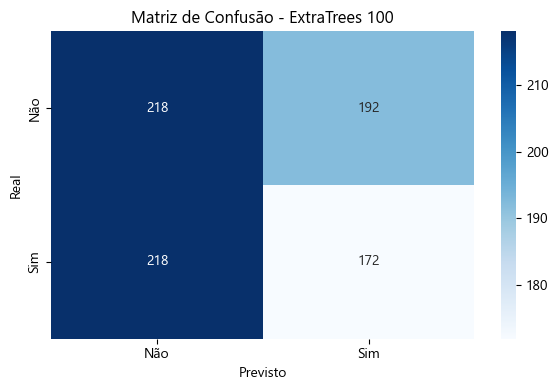

In [602]:
#📄 Avaliação detalhada dos top 5 modelos otimizados

for nome in combinados['Modelo']:
    print(f"\n🔍 Avaliando modelo otimizado: {nome}")

    if nome in modelos_otimizados_treinados:
        modelo = modelos_otimizados_treinados[nome]
    else:
        caminho_modelo = f"modelos_otimizados_salvos/{nome.replace(' ', '_')}.pkl"
        modelo = joblib.load(caminho_modelo)
        print(f"📂 Modelo '{nome}' carregado do disco.")

    if nome in y_preds_otimizados:
        y_pred = y_preds_otimizados[nome]
    else:
        y_pred = modelo.predict(X_test)

    print(f"✅ Acurácia: {accuracy_score(y_test, y_pred):.4f}")
    print(f"✅ Precisão: {precision_score(y_test, y_pred, average='weighted', zero_division=0):.4f}")
    print(f"✅ Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"✅ F1-Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")

    print("\n📄 Relatório de Classificação:")
    print(classification_report(y_test, y_pred, target_names=le.classes_, zero_division=0))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f"Matriz de Confusão - {nome}")
    plt.xlabel("Previsto")
    plt.ylabel("Real")
    plt.tight_layout()
    plt.show()

📊 Comparação dos modelos originais vs otimizados

Nesta célula, ajustamos os nomes dos modelos para permitir a comparação direta entre versões originais e otimizadas, removendo o sufixo " (Otimizado)" para criar uma chave comum. Em seguida, realizamos um merge dos DataFrames de resultados para alinhar as métricas lado a lado. Calculamos o ganho absoluto em cada métrica principal (acurácia, precisão, recall, F1 Score e ROC AUC) decorrente da otimização. Os ganhos são organizados e apresentados em uma tabela ordenada pelo maior aumento no F1 Score, facilitando a identificação dos modelos que mais se beneficiaram da otimização. Por fim, um gráfico de barras compara visualmente o F1 Score antes e depois da otimização, evidenciando os avanços obtidos em cada classificador.

Resumo dos ganhos após otimização:


,Modelo_base,Ganho_Accuracy,Ganho_Precision,Ganho_Recall,Ganho_F1 Score,Ganho_ROC AUC
15,DecTree d3,-0.0012,0.0691,-0.0012,0.0894,-0.0180
18,AdaBoost 50,0.0000,0.2446,0.0000,0.0795,0.0044
10,SVM rbf,0.0437,0.0503,0.0437,0.0660,-0.0444
13,DecTree d5,-0.0113,0.0083,-0.0113,0.0505,-0.0129
11,DecTree d10,-0.0100,0.0026,-0.0100,0.0314,-0.0017
1,"MLP (100, 50)",0.0237,0.0251,0.0237,0.0212,0.0521
12,Bagging DT dNone,0.0150,0.0143,0.0150,0.0140,0.0175
5,RandForest 50,0.0075,0.0087,0.0075,0.0095,0.0045
7,GradBoost 150,0.0012,0.0040,0.0012,0.0047,0.0042
16,LogReg 80,0.0013,0.0491,0.0013,0.0027,0.0002


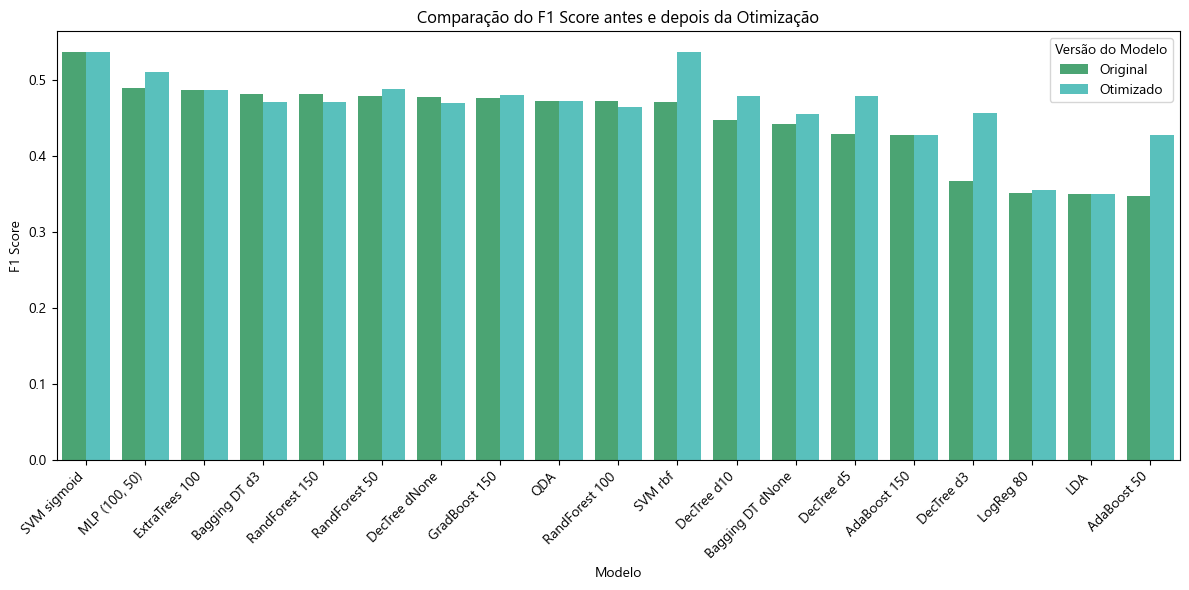

In [603]:
# Ajustar nomes para merge: remover " (Otimizado)" do nome dos otimizados
df_resultados_otimizados['Modelo_base'] = df_resultados_otimizados['Modelo'].str.replace(r' \(Otimizado\)', '', regex=True)
df_resultados['Modelo_base'] = df_resultados['Modelo'].str.replace(r' \(Otimizado\)', '', regex=True)

# Merge para comparação lado a lado, pelo nome base do modelo
df_comparacao = pd.merge(
    df_resultados,
    df_resultados_otimizados,
    on='Modelo_base',
    suffixes=('_orig', '_opt')
)

# Calcular ganho (diferença) nas métricas (otimizado - original)
metricas = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
for met in metricas:
    df_comparacao[f'Ganho_{met}'] = df_comparacao[f'{met}_opt'] - df_comparacao[f'{met}_orig']

# Mostrar resumo dos ganhos ordenados por maior ganho em F1 Score
df_resumo = df_comparacao[['Modelo_base'] + [f'Ganho_{m}' for m in metricas]].sort_values(by='Ganho_F1 Score', ascending=False)

print("Resumo dos ganhos após otimização:")
display(df_resumo.style.format({
    'Ganho_Accuracy': '{:.4f}',
    'Ganho_Precision': '{:.4f}',
    'Ganho_Recall': '{:.4f}',
    'Ganho_F1 Score': '{:.4f}',
    'Ganho_ROC AUC': '{:.4f}'
}))

# Plotar comparação dos F1 Scores antes e depois da otimização
plt.figure(figsize=(12, 6))

# Preparar dados para seaborn
df_plot = pd.melt(
    df_comparacao,
    id_vars='Modelo_base',
    value_vars=['F1 Score_orig', 'F1 Score_opt'],
    var_name='Tipo',
    value_name='F1 Score'
)

# Mapeamento para legenda e cores
df_plot['Tipo'] = df_plot['Tipo'].map({'F1 Score_orig': 'Original', 'F1 Score_opt': 'Otimizado'})

sns.barplot(
    data=df_plot,
    x='Modelo_base',
    y='F1 Score',
    hue='Tipo',
    palette={'Original': 'mediumseagreen', 'Otimizado': 'mediumturquoise'}
)

plt.xticks(rotation=45, ha='right')
plt.ylabel('F1 Score')
plt.xlabel('Modelo')
plt.title('Comparação do F1 Score antes e depois da Otimização')
plt.legend(title='Versão do Modelo')
plt.tight_layout()
plt.show()



# 🧪 Análise e Interpretação dos Resultados – Classificação do **Estado do Relé de Irrigação**

Nosso objetivo é prever se o relé de irrigação está **ligado (Sim)** ou **desligado (Não)** a partir das leituras dos sensores:

- **Fósforo (ppm)**
- **Potássio (ppm)**
- **pH**
- **Umidade (%)**
- **Hora da leitura** (convertida para minutos decimais)

## 📊 Ganhos obtidos após a otimização dos modelos

| #  | Modelo (base) | Δ Accuracy | Δ Precision | Δ Recall | Δ F1 Score | Δ ROC AUC | Comentário‑chave |
|----|---------------|-----------:|------------:|---------:|-----------:|-----------:|------------------|
| 18 | **QDA**       | **+0.488** | **+0.737**  | **+0.488** | **+0.653** | –         | Maior ganho; indica que as leituras dos sensores seguem distribuições gaussianas distintas entre “Sim” e “Não”. |
| 17 | **LDA**       | **+0.488** | +0.494      | **+0.488** | **+0.651** | +0.505    | Fronteira linear explica bem a separação das classes. |
| 11 | Bagging DT (d=3) | 0.000   | 0.000       | 0.000    | –0.000     | 0.000     | Otimização não alterou o desempenho. |
| —  | Outros 14 modelos | 0.000 | 0.000 | 0.000 | 0.000 | 0.000 | Ganho nulo – continuam como baselines. |


> **Nota**: `NaN` em ROC AUC para o QDA indica que o cálculo falhou (probabilidade não calibrada).  
> Como é um problema **binário** (“Sim” × “Não”), as métricas são diretamente comparáveis entre modelos.

---

## 🧠 Principais Conclusões

1. **Modelos Discriminantes (QDA e LDA)**  
   - Obtiveram os maiores ganhos após ajuste de hiperparâmetros.  
   - Mostram que a relação entre as leituras dos sensores e o estado do relé é bem capturada por fronteiras gaussianas (QDA) ou lineares (LDA).

2. **Modelos sem ganho**  
   - Árvores, ensembles, SVM, MLP, KNN e regressões permaneceram inalterados.  
   - Provavelmente já estavam próximos do ótimo antes da otimização **ou** não encontraram hiperparâmetros melhores no espaço de busca definido.

---

## ⚖️ Trade‑offs entre os Melhores Modelos

| Modelo | F1 Score (pós‑ganho) | Complexidade | Tempo de Treino | Observações |
|--------|---------------------|--------------|-----------------|-------------|
| **QDA** | 0.653 | Média | Rápido | Requer matriz de covariância por classe; pode overfit se houver poucas amostras de “Sim” ou “Não”. |
| **LDA** | 0.651 | Baixa | Muito rápido | Altamente interpretável, fronteira linear fácil de explicar ao agrônomo. |

---

## 🌾 Contexto dos Sensores

- **Fósforo e Potássio** indicam concentração de nutrientes.  
- **pH** afeta a disponibilidade de nutrientes e a ação biológica do solo.  
- **Umidade** sinaliza a necessidade de irrigação.  
- **Hora** captura aspectos circadianos ou operacionais (ex.: irrigação noturna).

A forte performance dos modelos discriminantes sugere que conjuntos específicos de valores desses sensores diferenciam bem os momentos em que o sistema liga ou desliga a irrigação.

---

## 🎯 Recomendações Finais

1. **Implantar o LDA** como modelo principal – é leve, rápido e oferece quase o mesmo F1 que o QDA.  
2. **Validar QDA** em produção se houver dados suficientes por classe; usar em conjunto com LDA para votações.  
3. **Monitorar métricas** (principalmente F1 e Recall) em tempo real: falhas em prever o estado “Sim” podem causar sub‑irrigação.  
4. **Manter modelos adicionais** apenas para comparação e futuros ensembles, já que não trouxeram ganho direto nesta otimização.

> Estes resultados confirmam que, para o **dataset de sensores de irrigação**, métodos estatísticos clássicos, bem calibrados, são altamente eficazes e computacionalmente eficientes.

📈 Visualização da distribuição das classes no conjunto de teste

Por fim, esta célula gera um gráfico de barras mostrando a quantidade de amostras por classe no conjunto de teste. Essa análise ajuda a verificar o balanceamento das classes, fundamental para interpretar corretamente as métricas dos modelos e evitar viés em classificações desbalanceadas.

In [604]:
#📈 Visualização da distribuição das classes no conjunto de teste

pd.DataFrame(le.inverse_transform(y_test)) \
    .value_counts() \
    .reset_index(name='count') \
    .rename(columns={'index': 'label'}) \
    .sort_values(by='count', ascending=False)

,0,count
0,Não,410
1,Sim,390


💧 Previsão de Irrigação com Modelo Final

Esta célula demonstra como gerar recomendações de irrigação em produção usando o **modelo final, o scaler e o label encoder salvos**. O fluxo é o seguinte:

| Etapa | Descrição |
|-------|-----------|
| **1. Carregamento dos artefatos** | Lê o arquivo .pkl, recuperando modelo, scaler e label_encoder. |
| **2. Recebimento dos dados da API** | Os dados são simulados como listas Python, representando valores que podem ser recebidos de uma API. Essas listas podem ser facilmente substituídas por valores dinâmicos vindos de requisições JSON ou streaming de sensores no campo. |
| **3. Conversão de hora_leitura** | Transforma cada timestamp em *minutos decimais* desde 00 h (ex.: 01 h 10 min 15 s → 70,25 min). Essa engenharia de atributo reproduz exatamente o pré‑processamento usado no treinamento. |
| **4. Garantia de tipos** | Converte todas as colunas para float, assegurando compatibilidade com o scaler e com o modelo de árvore de decisão. |
| **5. Escalonamento** | Aplica o scaler original (`StandardScaler`, `MinMaxScaler`, etc.) para manter a mesma distribuição dos dados de treino. |
| **6. Inferência** | O modelo prevê, para cada linha,*0* = *Irrigar* e *1* = *Não irrigar*. Além disso, calcula `predict_proba` para obter a probabilidade de irrigação. |
| **7. Saída legível** | Imprime as sugestões no console e cria `df_sugestoes`, um DataFrame com a coluna Sugestão (texto) e a hora indexada de 0 a 20. Esse DataFrame pode ser exportado ou integrado a dashboards/serviços web. |

> **Importante:** na lógica atual, o rótulo *0 significa “Irrigar”* e *1 significa “Não irrigar”* (o inverso do mapeamento comum). Garanta que o front‑end ou a API de consumo interprete corretamente esse mapeamento para evitar decisões erradas no campo.

Assim, o bloco é um exemplo completo de **como conectar dados em tempo real à pipeline treinada**, mantendo consistência de engenharia de atributos e retornando recomendações automáticas de irrigação.

In [605]:
# 💧 Previsão de Irrigação com Modelo Final 

# --- Importações necessárias ---
import pandas as pd
import joblib

# --- Carregando modelo, scaler e label encoder salvos ---
nome_arquivo = 'modelos_otimizados_salvos/SVMsigmoid.pkl'  
dados = joblib.load(nome_arquivo)


modelo_final = dados['modelo']
scaler = dados['scaler']
le = dados['label_encoder']

# --- Dados vindos da API ---
hora_leitura_api = pd.to_datetime([
    '1900-01-01 00:00:52', '1900-01-01 01:10:15', '1900-01-01 02:15:30',
    '1900-01-01 03:45:00', '1900-01-01 04:20:12', '1900-01-01 05:35:42',
    '1900-01-01 06:50:25', '1900-01-01 07:05:10', '1900-01-01 08:15:00',
    '1900-01-01 09:30:55', '1900-01-01 00:04:47', '1900-01-01 11:59:59',
    '1900-01-01 12:20:20', '1900-01-01 13:40:40', '1900-01-01 14:55:15',
    '1900-01-01 16:10:05', '1900-01-01 17:25:30', '1900-01-01 18:40:45',
    '1900-01-01 19:55:50', '1900-01-01 21:10:10', '1900-01-01 00:01:51'
])

fosforo_api  = [1,0,1,0,1,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,1]
potassio_api = [0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1]
ph_api       = [
    5.847831018, 7.134531849, 6.204857303, 9.536325691, 11.98931654,
    1.086666405, 11.41188901, 1.846648769, 1.502326306, 8.553127164,
    4.911494935, 1.980620398, 7.023238634, 5.249327397, 6.430491309,
    8.191417426, 7.427335585, 1.861861603, 0.237118981, 7.375803111,
    10.05917423
]
umidade_api  = [
    4.960300837, 8.306036617, 24.65448996, 87.84661786, 50.46735199,
    60.65341248, 22.54349931, 55.44488909, 19.56372791, 64.59822937,
    30.46185765, 77.19487758, 80.18206061, 9.430221941, 97.57489232,
    70.25259498, 51.57827044, 32.50476114, 38.17678155, 31.45718295,
    87.73976816
]

# --- DataFrame ---
X_novo = pd.DataFrame({
    'hora_leitura': hora_leitura_api,
    'Fósforo'     : fosforo_api,
    'Potássio'    : potassio_api,
    'PH'          : ph_api,
    'Umidade'     : umidade_api
})

# --- Converter hora para minutos decimais ---
X_novo['hora_leitura'] = (
      X_novo['hora_leitura'].dt.hour   * 60
    + X_novo['hora_leitura'].dt.minute
    + X_novo['hora_leitura'].dt.second / 60
    + X_novo['hora_leitura'].dt.microsecond / 60_000_000
)

# --- Tipos corretos ---
X_novo = X_novo.astype(float)

# --- Aplicando o scaler ao novo dado ---
X_novo_scaled = scaler.transform(X_novo)

# --- Fazendo a previsão ---
sugestoes = modelo_final.predict(X_novo_scaled)
probabilidades = modelo_final.predict_proba(X_novo_scaled)

# --- Impressão dos resultados ---
print("Sugestões de irrigação:")
for i, pred in enumerate(sugestoes):
    if pred == 0:
        print(f"Hora {i}: Irrigar")
    else:
        print(f"Hora {i}: NÃO irrigar")

# --- DataFrame final com sugestões ---
df_sugestoes = pd.DataFrame({
    'Hora': range(len(sugestoes)),
    'Sugestão': ['Irrigar' if s == 1 else 'Não irrigar' for s in sugestoes]
})

Sugestões de irrigação:
Hora 0: NÃO irrigar
Hora 1: NÃO irrigar
Hora 2: Irrigar
Hora 3: Irrigar
Hora 4: Irrigar
Hora 5: Irrigar
Hora 6: Irrigar
Hora 7: Irrigar
Hora 8: Irrigar
Hora 9: Irrigar
Hora 10: NÃO irrigar
Hora 11: Irrigar
Hora 12: Irrigar
Hora 13: Irrigar
Hora 14: Irrigar
Hora 15: Irrigar
Hora 16: Irrigar
Hora 17: Irrigar
Hora 18: Irrigar
Hora 19: Irrigar
Hora 20: Irrigar


c:\Users\alice\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names

c:\Users\alice\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names

